In [105]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [106]:
data = pd.read_csv('vacation.csv')
data.drop(["everything organised", "change of surroundings", "health and beauty", "maintain unspoilt surroundings", "realise creativity", "luxury / be spoilt", "free-and-easy-going", "not care about prices", "cosiness/familiar atmosphere", "entertainment facilities", "intense experience of nature"], axis=1, inplace= True)
data.head()

,Gender,Age,Education,Income,Income2,Occupation,State,Relationship.Status,Obligation,Obligation2,...,Vacation.Behaviour,rest and relax,do sports,"excitement, a challenge",not exceed planned budget,fun and entertainment,good company,life style of the local people,unspoilt nature/natural landscape,cultural offers
0,Female,25,6.0,"$30,001 to $60,000",30-60k,Clerical or service worker,VIC,single,4.800000,Q4,...,2.066667,yes,no,no,no,no,no,no,no,no
1,Female,31,8.0,"$120,001 to $150,000",>120k,professional,WA,married,3.300000,Q1,...,2.000000,yes,no,no,no,yes,no,yes,no,no
2,Male,21,3.0,"$90,001 to $120,000",90-120k,NaN,NSW,single,3.400000,Q2,...,1.233333,yes,no,no,no,no,no,yes,no,yes
3,Female,18,2.0,"$30,001 to $60,000",30-60k,unemployed,NSW,single,2.633333,Q1,...,2.166667,yes,no,no,yes,yes,yes,no,no,no
4,Male,61,3.0,"Less than $30,000",<30k,retired,WA,married,3.400000,Q2,...,1.724138,yes,no,no,yes,no,no,yes,no,no


In [107]:
data.describe()

,Age,Education,Obligation,NEP,Vacation.Behaviour
count,1000.000000,992.000000,1000.000000,1000.000000,975.000000
mean,44.168000,4.813508,3.734767,3.648600,2.962800
std,14.539228,2.422252,0.635777,0.561135,0.668347
min,18.000000,1.000000,1.000000,1.733333,1.233333
25%,32.000000,3.000000,3.366667,3.266667,2.466667
50%,42.000000,6.000000,3.800000,3.666667,2.944444
75%,57.000000,7.000000,4.200000,4.066667,3.428571
max,105.000000,8.000000,5.000000,5.000000,4.900000


In [108]:
data.isnull().sum()

Gender                                0
Age                                   0
Education                             8
Income                               66
Income2                              66
Occupation                           59
State                                 0
Relationship.Status                   4
Obligation                            0
Obligation2                           0
NEP                                   0
Vacation.Behaviour                   25
rest and relax                        0
do sports                             0
excitement, a challenge               0
not exceed planned budget             0
fun and entertainment                 0
good company                          0
life style of the local people        0
unspoilt nature/natural landscape     0
cultural offers                       0
dtype: int64

In [109]:
data['Income'].fillna("bfill", inplace = True)
data['Income2'].fillna("bfill", inplace = True)
data['Education'] = data['Education'].fillna(data['Education'].median())
data['Vacation.Behaviour'] = data['Vacation.Behaviour'].fillna(data['Vacation.Behaviour'].median())
data['Occupation'].fillna("NaN", inplace= True)
data['Relationship.Status'].fillna(method="bfill", inplace= True)
data.isnull().sum()


Gender                               0
Age                                  0
Education                            0
Income                               0
Income2                              0
Occupation                           0
State                                0
Relationship.Status                  0
Obligation                           0
Obligation2                          0
NEP                                  0
Vacation.Behaviour                   0
rest and relax                       0
do sports                            0
excitement, a challenge              0
not exceed planned budget            0
fun and entertainment                0
good company                         0
life style of the local people       0
unspoilt nature/natural landscape    0
cultural offers                      0
dtype: int64

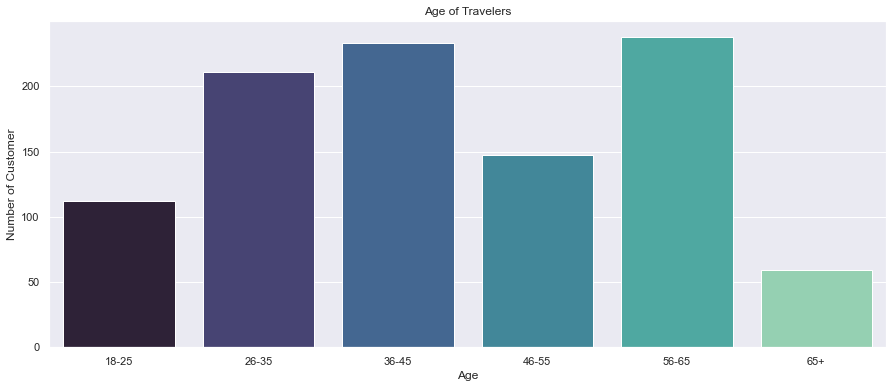

In [110]:
age_18_25 = data.Age[(data.Age >= 18) & (data.Age <= 25)]
age_26_35 = data.Age[(data.Age >= 26) & (data.Age <= 35)]
age_36_45 = data.Age[(data.Age >= 36) & (data.Age <= 45)]
age_46_55 = data.Age[(data.Age >= 46) & (data.Age <= 55)]
age_56_65 = data.Age[(data.Age >= 56) & (data.Age <= 65)]
age_65above = data.Age[(data.Age >= 66)]

agex = ["18-25", "26-35", "36-45", "46-55", "56-65", "65+"]
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_56_65.values), len(age_65above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette="mako")
plt.title("Age of Travelers")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

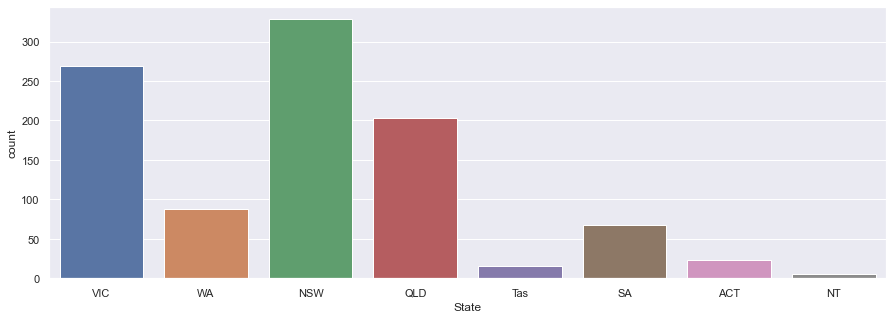

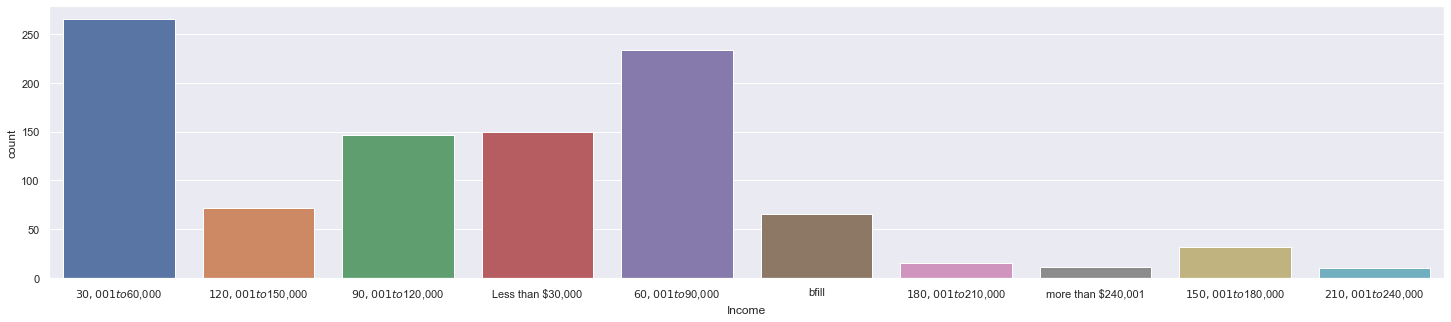

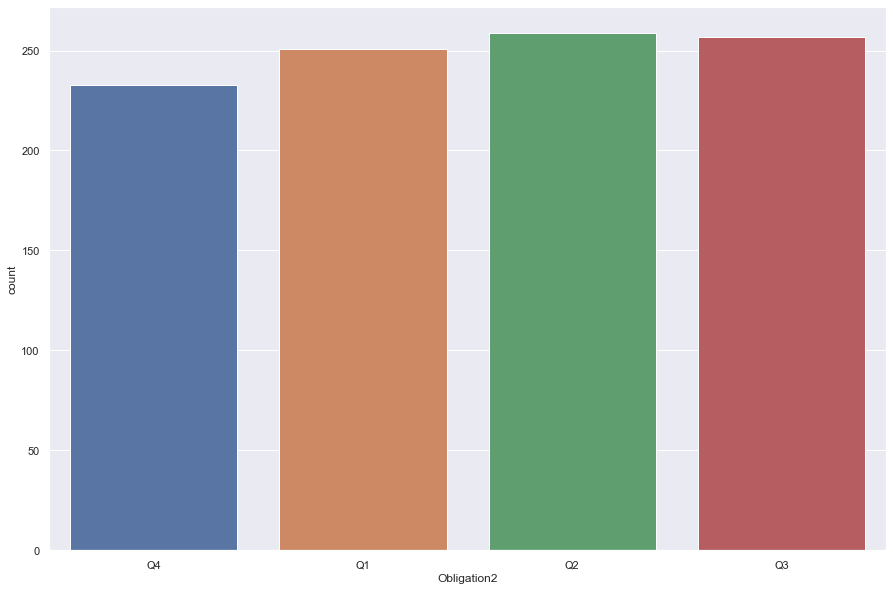

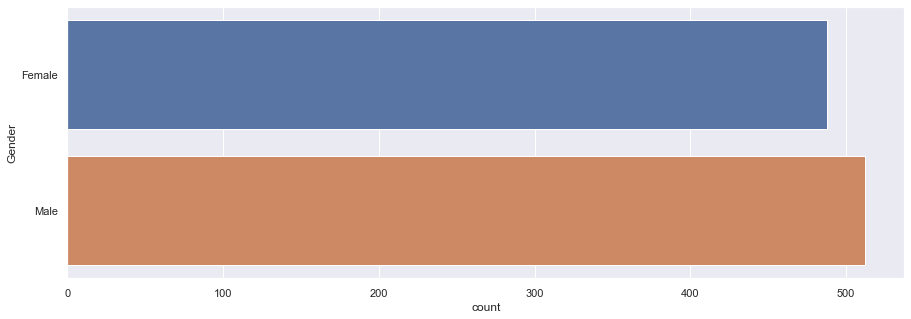

In [111]:
plt.figure(figsize=(15,5))
sns.countplot(x='State', data= data)
plt.show()

plt.figure(figsize=(25,5))
sns.countplot(x='Income', data= data)
plt.show()

plt.figure(figsize=(15,10))
sns.countplot(x='Obligation2', data= data)
plt.show()

plt.figure(figsize=(15,5))
sns.countplot(y='Gender', data= data)
plt.show()

Text(0.5, 1.0, 'visualisation of raw data')

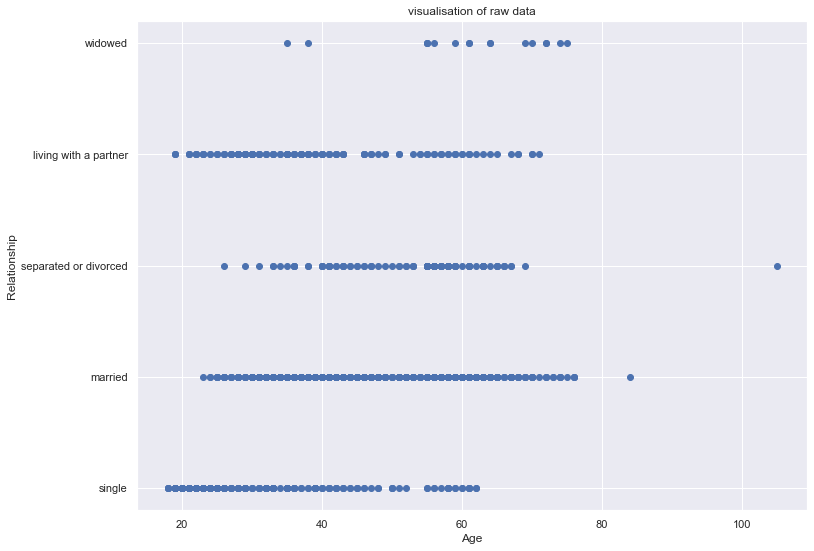

In [112]:
plt.figure(figsize = (12, 9))
plt.scatter(data.iloc[:, 1], data.iloc[:, 7])
plt.xlabel('Age')
plt.ylabel('Relationship')
plt.title('visualisation of raw data')

Text(0.5, 1.0, 'visualisation of raw data')

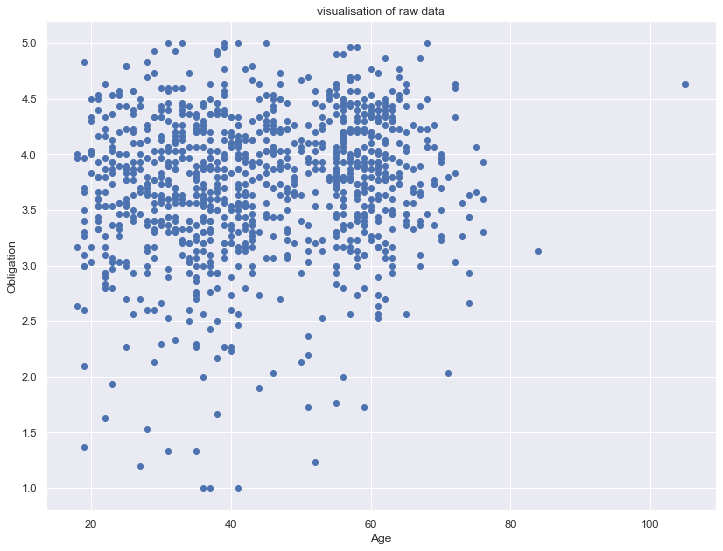

In [113]:
plt.figure(figsize = (12, 9))
plt.scatter(data.iloc[:, 1], data.iloc[:, 8])
plt.xlabel('Age')
plt.ylabel('Obligation')
plt.title('visualisation of raw data')

Text(0.5, 1.0, 'visualisation of raw data')

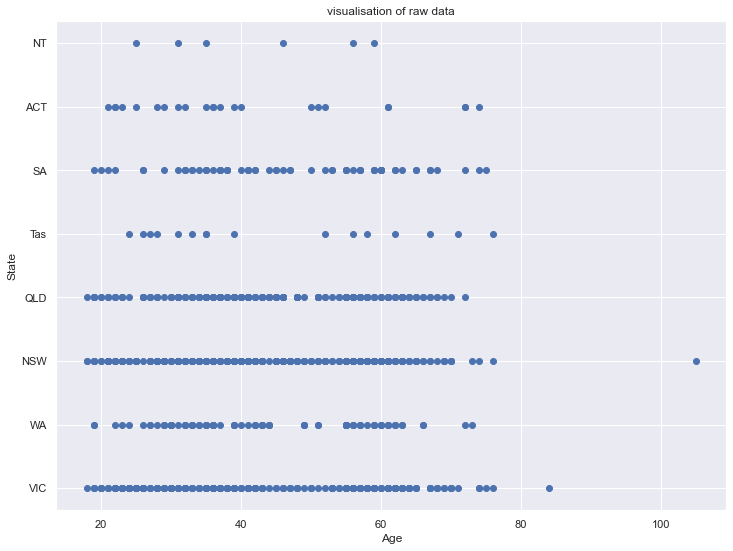

In [114]:
plt.figure(figsize = (12, 9))
plt.scatter(data.iloc[:, 1], data.iloc[:, 6])
plt.xlabel('Age')
plt.ylabel('State')
plt.title('visualisation of raw data')

Text(0.5, 1.0, 'visualisation of raw data [3]')

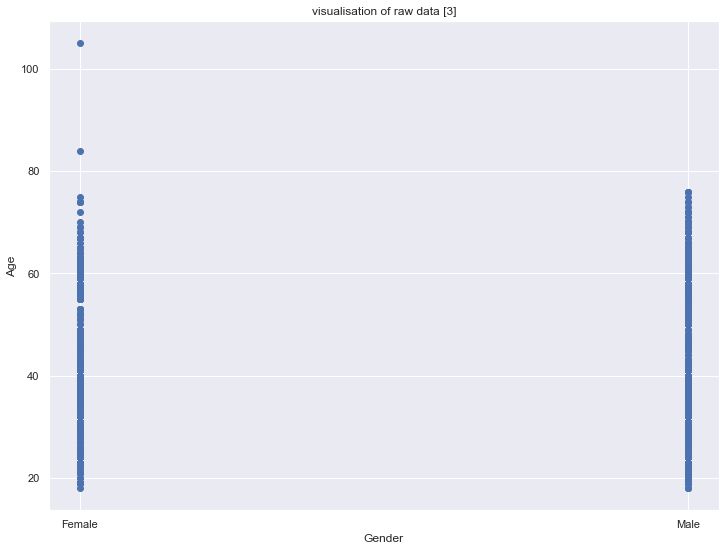

In [115]:
plt.figure(figsize = (12, 9))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1])
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('visualisation of raw data [3]')

Text(0.5, 1.0, 'visualisation of raw data [2]')

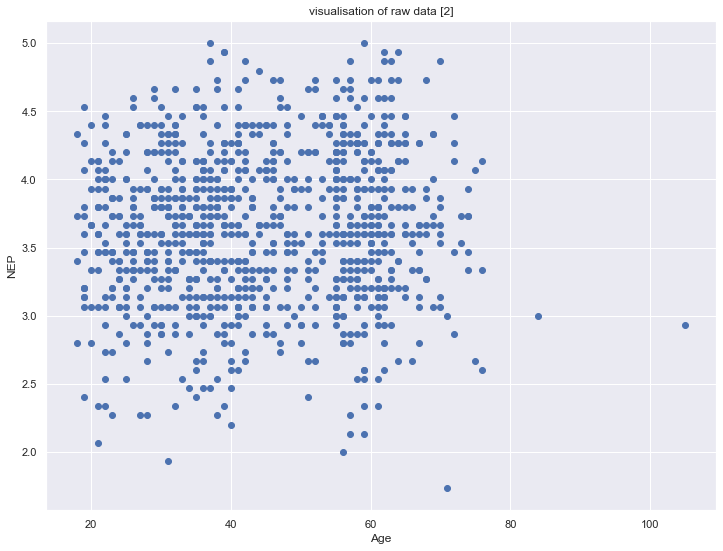

In [116]:
plt.figure(figsize = (12, 9))
plt.scatter(data.iloc[:, 1], data.iloc[:, 10])
plt.xlabel('Age')
plt.ylabel('NEP')
plt.title('visualisation of raw data [2]')

Text(0.5, 1.0, 'visualisation of raw data [3]')

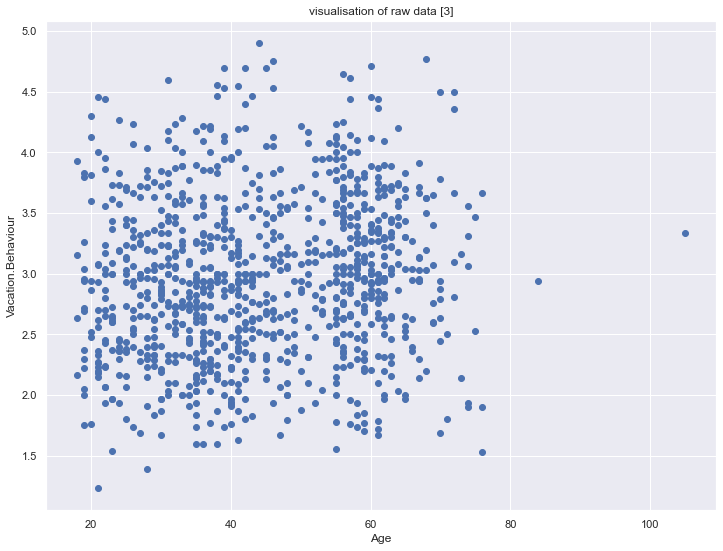

In [117]:
plt.figure(figsize = (12, 9))
plt.scatter(data.iloc[:, 1], data.iloc[:, 11])
plt.xlabel('Age')
plt.ylabel('Vacation.Behaviour')
plt.title('visualisation of raw data [3]')

In [118]:
LB = LabelEncoder()

In [119]:
data['Gender'] = LB.fit_transform(data['Gender'])
data['Obligation2'] = LB.fit_transform(data['Obligation2'])
data['Relationship.Status'] = LB.fit_transform(data['Relationship.Status'])
data['State'] = LB.fit_transform(data['State'])
data['Income'] = LB.fit_transform(data['Income'])
data['Income2'] = LB.fit_transform(data['Income2'])
data['Occupation'] = LB.fit_transform(data['Occupation'])
data['rest and relax'] = LB.fit_transform(data['rest and relax'])
data['do sports'] = LB.fit_transform(data['do sports'])
data['excitement, a challenge'] = LB.fit_transform(data['excitement, a challenge'])
data['not exceed planned budget'] = LB.fit_transform(data['not exceed planned budget'])
data['fun and entertainment'] = LB.fit_transform(data['fun and entertainment'])
data['good company'] = LB.fit_transform(data['good company'])
data['life style of the local people'] = LB.fit_transform(data['life style of the local people'])
data['unspoilt nature/natural landscape'] = LB.fit_transform(data['unspoilt nature/natural landscape'])
data['cultural offers'] = LB.fit_transform(data['cultural offers'])


In [120]:
data.describe()

,Gender,Age,Education,Income,Income2,Occupation,State,Relationship.Status,Obligation,Obligation2,...,Vacation.Behaviour,rest and relax,do sports,"excitement, a challenge",not exceed planned budget,fun and entertainment,good company,life style of the local people,unspoilt nature/natural landscape,cultural offers
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.512000,44.168000,4.82300,4.870000,1.86500,4.624000,3.527000,1.439000,3.734767,1.472000,...,2.962341,0.89900,0.135000,0.334000,0.514000,0.530000,0.457000,0.459000,0.263000,0.283000
std,0.500106,14.539228,2.41485,2.062851,1.60666,2.741558,2.283086,1.030214,0.635777,1.103827,...,0.659937,0.30148,0.341895,0.471876,0.500054,0.499349,0.498397,0.498566,0.440483,0.450682
min,0.000000,18.000000,1.00000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.233333,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,32.000000,3.00000,4.000000,0.00000,3.000000,1.000000,1.000000,3.366667,0.000000,...,2.479565,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,42.000000,6.00000,5.000000,2.00000,5.000000,3.000000,1.000000,3.800000,1.000000,...,2.944444,1.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,57.000000,7.00000,6.000000,3.00000,6.000000,6.000000,2.000000,4.200000,2.000000,...,3.400000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,105.000000,8.00000,9.000000,5.00000,11.000000,7.000000,4.000000,5.000000,3.000000,...,4.900000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [121]:
data.corr()

,Gender,Age,Education,Income,Income2,Occupation,State,Relationship.Status,Obligation,Obligation2,...,Vacation.Behaviour,rest and relax,do sports,"excitement, a challenge",not exceed planned budget,fun and entertainment,good company,life style of the local people,unspoilt nature/natural landscape,cultural offers
Gender,1.000000,0.000135,0.161316,-0.092605,0.010116,0.258095,-0.000722,0.010165,-0.152481,-0.162588,...,-0.164899,-0.035108,0.157365,0.025417,-0.084730,0.010582,-0.024032,0.003983,-0.021157,0.000462
Age,0.000135,1.000000,-0.176686,0.070150,0.012970,0.009874,-0.000861,-0.173539,0.119367,0.102522,...,0.124953,-0.051162,-0.187212,-0.154966,0.011792,-0.304160,0.001136,0.073588,0.068744,-0.016123
Education,0.161316,-0.176686,1.000000,-0.169197,0.069171,0.040438,-0.056596,0.100069,-0.060165,-0.028336,...,-0.083098,-0.012205,0.108990,0.109910,-0.134308,0.050480,0.017373,0.119096,0.072980,0.186795
Income,-0.092605,0.070150,-0.169197,1.000000,0.117322,-0.024405,0.083212,0.062208,0.001313,-0.008634,...,0.037664,0.001400,-0.040379,-0.025277,0.081339,-0.093387,-0.045361,-0.070398,0.039868,-0.085286
Income2,0.010116,0.012970,0.069171,0.117322,1.000000,-0.055168,-0.040348,0.043703,-0.013987,-0.020477,...,0.044833,-0.038511,0.055079,0.060854,-0.045613,-0.019277,-0.014132,0.014952,-0.047376,0.123319
Occupation,0.258095,0.009874,0.040438,-0.024405,-0.055168,1.000000,0.024653,0.049641,-0.021916,-0.022006,...,-0.010230,-0.015715,0.043529,0.050747,0.024288,-0.004182,0.046030,0.059015,-0.003408,0.001951
State,-0.000722,-0.000861,-0.056596,0.083212,-0.040348,0.024653,1.000000,0.004531,-0.021324,-0.017375,...,0.033533,0.022145,-0.021987,-0.018600,0.030795,-0.017833,-0.020971,0.045823,0.000397,0.018347
Relationship.Status,0.010165,-0.173539,0.100069,0.062208,0.043703,0.049641,0.004531,1.000000,-0.005852,-0.015147,...,0.018799,0.033322,0.019140,0.097548,0.002631,0.014263,0.082616,0.024359,0.025462,0.070635
Obligation,-0.152481,0.119367,-0.060165,0.001313,-0.013987,-0.021916,-0.021324,-0.005852,1.000000,0.888512,...,0.513348,0.049847,0.037792,0.061019,0.119320,-0.017845,0.080382,0.173505,0.195005,0.091044
Obligation2,-0.162588,0.102522,-0.028336,-0.008634,-0.020477,-0.022006,-0.017375,-0.015147,0.888512,1.000000,...,0.510511,0.047141,0.035224,0.077548,0.113148,-0.022083,0.098793,0.191626,0.205595,0.107498


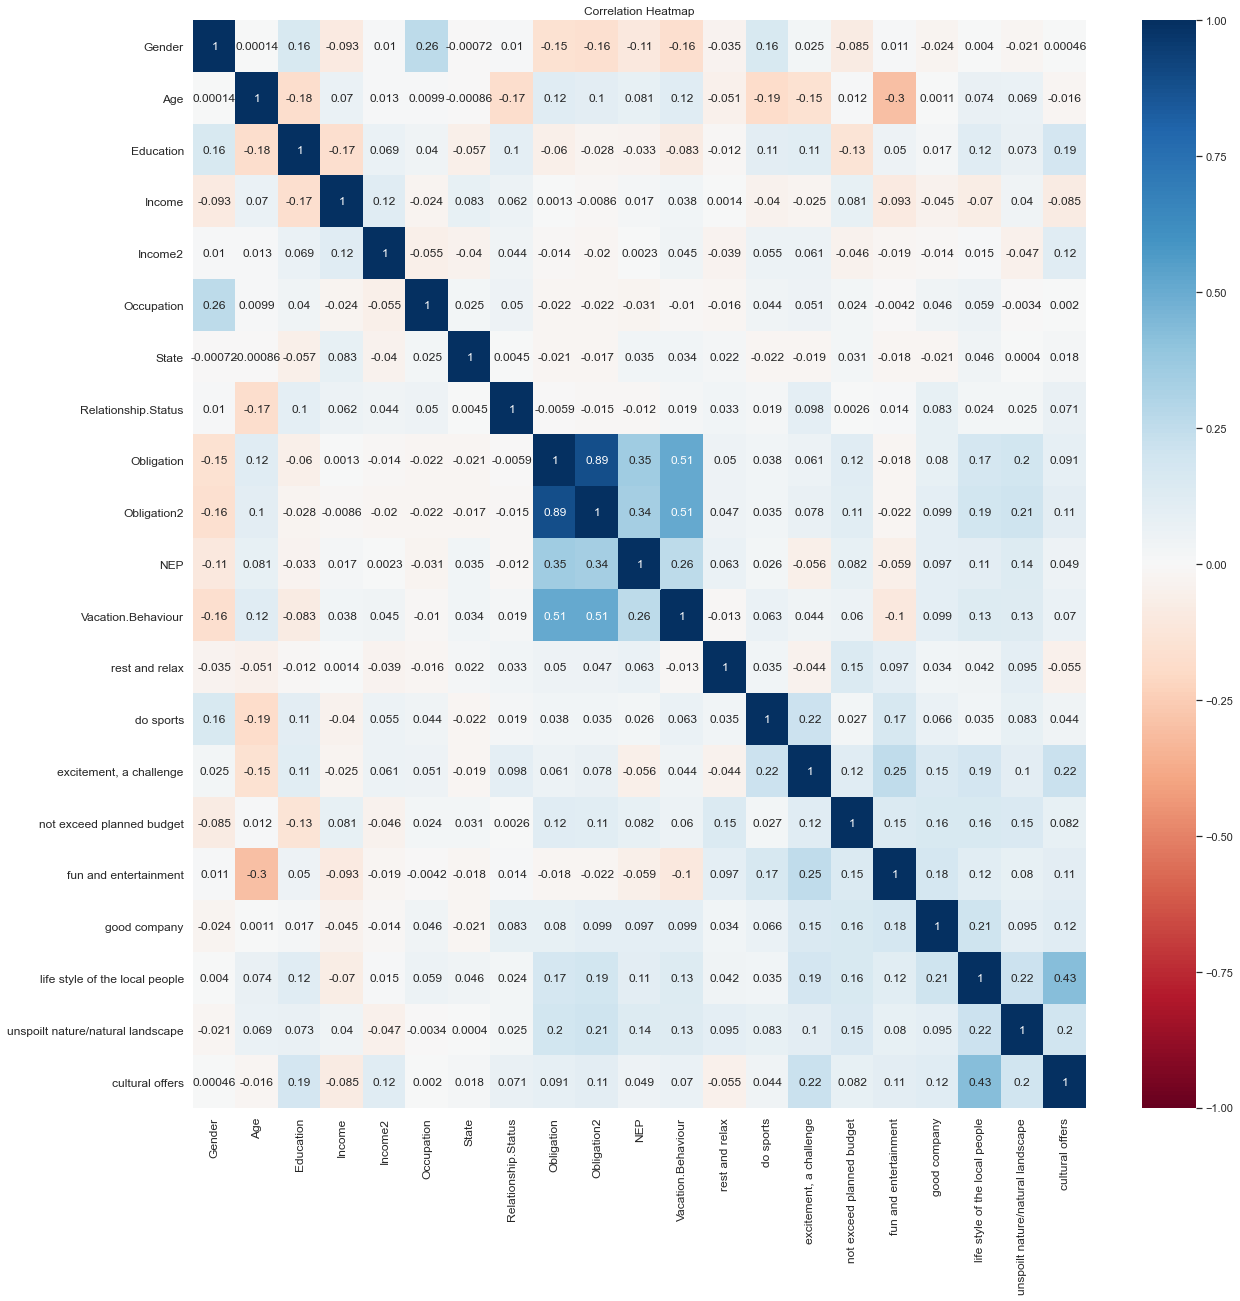

In [122]:
plt.figure(figsize = (20, 20))
s = sns.heatmap(data.corr(), 
                annot= True,
                cmap= 'RdBu',
                vmin = -1,
                vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0 , fontsize = 12) 
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap') 
plt.show()              

In [123]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler,QuantileTransformer,PowerTransformer,Normalizer

Standardization

In [124]:
advance_data = data
advance_data.drop(["rest and relax",	"do sports",	"excitement, a challenge",	"not exceed planned budget",	"fun and entertainment",	"good company",	"life style of the local people",	"unspoilt nature/natural landscape",	"cultural offers"], axis=1, inplace= True)
advance_data.head()

,Gender,Age,Education,Income,Income2,Occupation,State,Relationship.Status,Obligation,Obligation2,NEP,Vacation.Behaviour
0,0,25,6.0,4,0,0,6,3,4.800000,3,3.200000,2.066667
1,0,31,8.0,0,4,5,7,1,3.300000,0,3.400000,2.000000
2,1,21,3.0,6,2,1,1,3,3.400000,1,3.066667,1.233333
3,0,18,2.0,4,0,11,1,3,2.633333,0,3.400000,2.166667
4,1,61,3.0,7,3,6,7,1,3.400000,1,3.733333,1.724138


In [125]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(advance_data) 
segmentation_std= pd.DataFrame(segmentation_std,columns=advance_data.columns)

In [126]:
hier_clust = linkage(segmentation_std, method='ward')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [30.0, 30.0, 52.5, 52.5],
  [10.0, 10.0, 41.25, 41.25],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [80.0, 80.0, 110.0, 110.0],
  [25.625, 25.625, 95.0, 95.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [165.0, 165.0, 175.0, 175.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [170.0, 170.0, 192.5, 192.5],
  [142.5, 142.5, 181.25, 181.25],
  [215.0, 215.0, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [220.0, 220.0, 240.0, 240.0],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [255.0, 255.0, 280.0, 280.0],
  [230.0, 230.0, 267.5, 267.5],
  [161.875, 161.875, 248.75, 248.75],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0

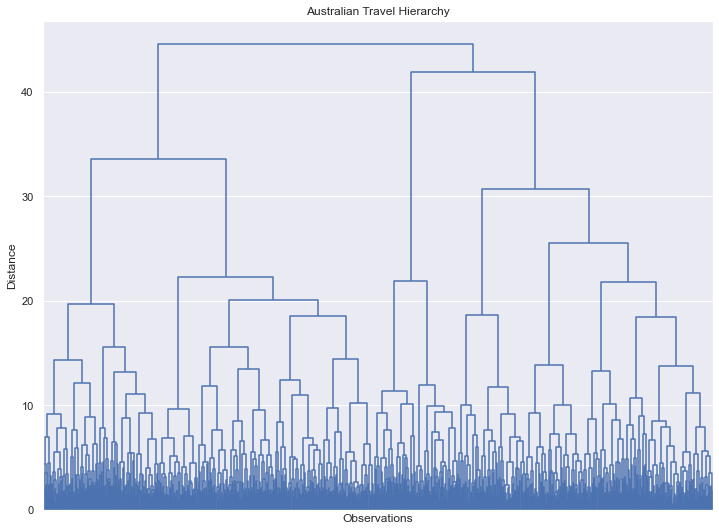

In [127]:
plt.figure(figsize= (12,9))
plt.title('Australian Travel Hierarchy')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
show_leaf_counts= False,
no_labels= True,
color_threshold=0)

In [128]:
advance_data.head()

,Gender,Age,Education,Income,Income2,Occupation,State,Relationship.Status,Obligation,Obligation2,NEP,Vacation.Behaviour
0,0,25,6.0,4,0,0,6,3,4.800000,3,3.200000,2.066667
1,0,31,8.0,0,4,5,7,1,3.300000,0,3.400000,2.000000
2,1,21,3.0,6,2,1,1,3,3.400000,1,3.066667,1.233333
3,0,18,2.0,4,0,11,1,3,2.633333,0,3.400000,2.166667
4,1,61,3.0,7,3,6,7,1,3.400000,1,3.733333,1.724138


In [129]:
segmentation_std= pd.DataFrame(segmentation_std)
print(segmentation_std.max())

Gender                 0.976281
Age                    4.186084
Education              1.316268
Income                 2.003085
Income2                1.952229
Occupation             2.326849
State                  1.521948
Relationship.Status    2.487136
Obligation             1.991055
Obligation2            1.384967
NEP                    2.409537
Vacation.Behaviour     2.937595
dtype: float64


Strandard SCalar

Kmean for Obligation

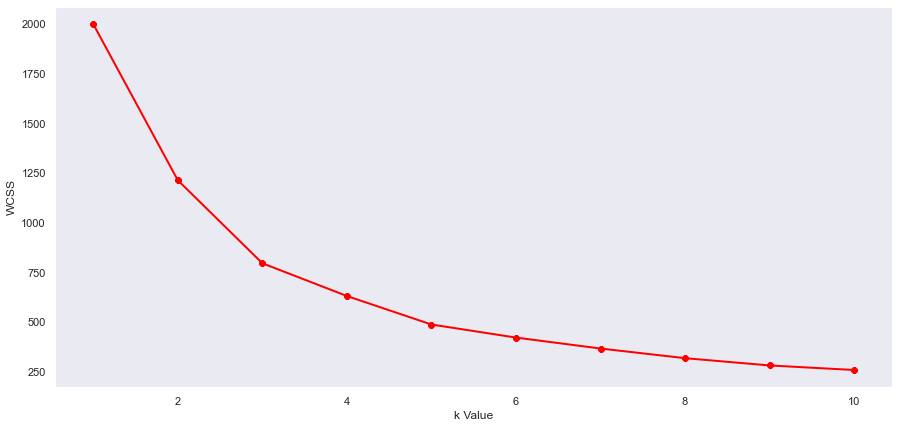

In [130]:
X1 = segmentation_std.loc[:, ["Age","Obligation"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [131]:
kmeans = KMeans(n_clusters= 3)
label = kmeans.fit_predict(X1)
print(label)

[1 2 1 2 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 2 1 2 1 1 1 1 2 1 1 2 0
 0 2 0 1 1 1 2 1 1 1 2 2 0 1 2 1 1 1 0 0 0 1 0 0 0 0 0 2 0 1 0 0 0 2 1 0 0
 2 2 0 1 2 1 1 0 1 1 1 1 0 0 2 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 2 2 1 1 1 0
 2 0 1 1 2 1 0 1 1 0 2 0 0 0 1 2 2 2 1 1 1 1 0 2 2 1 1 0 2 0 0 1 1 0 0 2 2
 1 1 0 1 1 0 1 2 2 0 0 2 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 2 0 1 1 1 0 2 1 0 0
 1 0 0 0 1 1 0 0 0 0 1 1 2 1 0 1 0 1 0 1 0 2 0 0 0 2 0 0 2 2 2 0 1 2 1 2 2
 1 1 0 1 1 0 2 1 0 2 0 2 1 0 2 2 1 1 2 1 0 0 2 2 1 1 0 0 2 0 1 0 0 0 0 0 1
 1 2 2 0 1 2 0 1 0 0 0 1 1 2 0 0 0 2 0 2 1 2 1 1 0 2 1 2 0 2 0 1 1 1 0 2 2
 2 1 1 0 1 2 1 0 2 1 1 2 1 0 2 2 0 2 2 1 0 0 0 2 0 1 0 0 0 2 2 1 0 2 1 1 1
 1 1 1 1 2 2 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 2 1 2 1 0 1 1 0 1 0 0
 1 1 1 1 0 0 1 0 1 2 0 2 1 0 1 0 0 2 1 0 2 2 1 1 1 0 0 0 1 1 2 1 2 1 2 2 2
 2 2 2 0 1 2 0 1 0 1 0 0 0 0 0 2 0 2 0 1 1 0 0 1 0 1 1 0 0 1 1 2 2 1 0 0 0
 0 2 0 1 2 2 1 0 0 1 0 2 2 0 2 1 1 0 2 0 0 2 0 0 2 1 2 0 2 0 1 0 0 1 2 2 2
 1 1 2 1 2 1 1 0 1 0 1 0 

In [132]:
print(kmeans.cluster_centers_)

[[ 1.04651968  0.30206869]
 [-0.7424175   0.48183406]
 [-0.49563061 -1.29826905]]


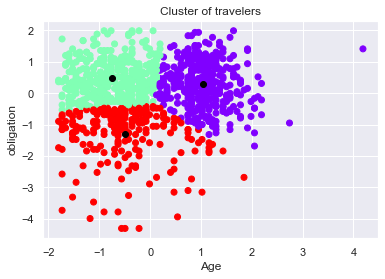

In [133]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of travelers')
plt.xlabel('Age')
plt.ylabel('obligation')
plt.show()

Kmean for Obligation2

Text(0, 0.5, 'WCSS')

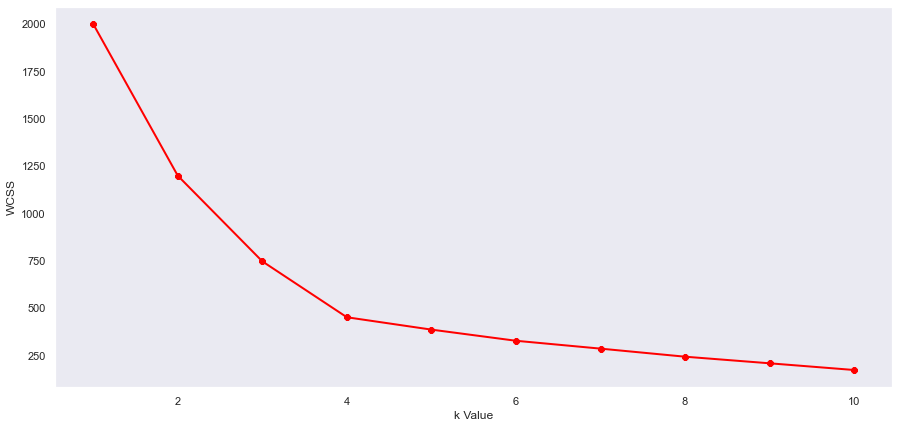

In [134]:
X1 = segmentation_std.loc[:, ["Age","Obligation2"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

In [135]:
kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(X1)
print(label)

[3 1 1 1 2 0 2 3 1 0 3 3 0 0 0 1 2 0 0 3 1 1 3 3 0 1 3 1 1 1 1 3 1 1 3 2 2
 0 1 2 3 1 1 1 3 3 3 1 1 2 1 1 1 0 3 0 2 0 3 2 2 2 0 0 2 0 1 0 2 2 1 3 0 0
 1 1 2 3 1 3 3 0 3 3 3 3 2 0 1 3 2 2 0 2 2 2 2 0 0 1 3 1 0 3 0 1 1 3 3 1 2
 1 0 3 1 1 3 0 1 3 0 1 0 0 0 3 1 1 1 3 3 1 3 0 2 2 1 0 2 1 2 0 3 3 2 0 1 1
 1 3 0 1 3 2 3 1 1 2 2 1 0 0 3 1 2 0 0 0 2 3 3 3 0 0 0 1 0 3 3 3 0 1 1 2 2
 3 0 2 0 1 1 2 0 2 0 1 1 2 3 2 3 2 3 0 1 0 1 2 0 0 1 0 2 1 2 1 0 3 2 1 1 1
 3 3 0 3 3 2 2 3 2 1 2 1 1 2 1 1 1 3 1 3 2 0 1 1 1 1 0 0 2 0 3 0 0 0 2 2 3
 3 2 1 0 3 1 0 3 0 0 0 3 3 1 0 0 2 2 0 1 3 1 3 3 2 1 3 1 0 1 0 3 3 3 2 2 1
 2 1 1 0 3 2 3 2 1 3 1 1 3 0 1 1 0 1 1 1 2 2 2 1 2 3 0 0 2 1 1 1 2 1 3 0 3
 3 3 3 3 1 1 3 1 2 2 3 2 3 3 2 1 2 2 0 3 0 0 2 0 3 2 1 1 1 3 0 1 3 2 3 0 0
 1 3 3 3 0 0 3 2 3 1 2 1 1 0 1 0 0 1 1 0 1 2 3 1 1 2 0 0 3 1 1 1 1 3 1 1 2
 2 1 1 0 1 1 0 1 0 3 0 2 0 0 0 1 0 1 2 3 3 0 0 1 2 1 3 0 2 3 1 1 1 3 0 0 0
 0 1 0 3 2 1 0 0 2 1 0 1 1 0 1 3 1 0 1 0 0 1 2 0 1 1 1 2 1 2 3 0 0 0 1 1 1
 3 0 1 3 1 1 0 2 1 0 3 2 

In [136]:
print(kmeans.cluster_centers_)

[[ 0.91562998  0.94815179]
 [-0.78152602 -0.90134897]
 [ 1.02586028 -0.83065812]
 [-0.77707918  0.86971531]]


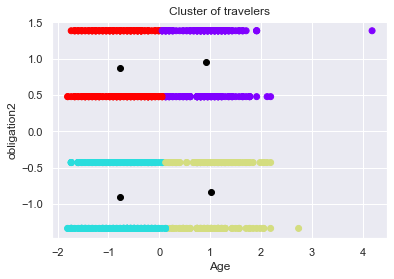

In [137]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of travelers')
plt.xlabel('Age')
plt.ylabel('obligation2')
plt.show()

Kmean for State

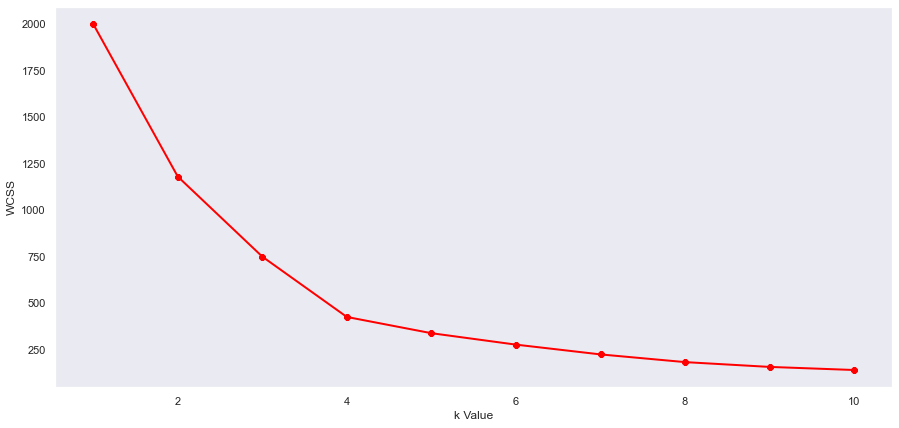

In [138]:
X1 = segmentation_std.loc[:, ["Age","State"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [139]:
kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(X1)
print(label)

[2 2 0 0 3 1 3 2 0 1 2 0 3 1 3 2 3 1 3 0 0 2 2 2 3 0 2 2 2 2 0 2 0 0 0 1 1
 1 0 1 0 0 0 2 0 0 0 2 0 1 0 0 0 1 2 1 3 1 0 3 1 3 1 3 1 3 2 3 1 1 0 0 1 1
 2 2 1 2 2 2 0 3 0 0 0 0 3 3 2 0 3 3 1 3 3 1 3 1 1 0 0 2 3 2 1 2 2 0 0 0 3
 0 1 2 0 2 0 3 0 0 1 2 1 3 3 2 2 2 2 0 2 0 0 1 1 1 0 2 3 2 1 1 2 0 1 3 2 2
 0 2 1 2 0 3 0 0 1 1 3 2 3 1 2 0 1 1 3 1 1 2 0 0 1 1 3 2 1 0 0 0 1 0 2 1 3
 0 1 1 1 2 0 3 3 1 3 2 0 1 0 3 0 1 2 3 0 1 0 1 1 1 0 3 3 2 3 0 3 0 1 0 0 0
 2 0 3 2 2 3 1 2 3 0 1 0 0 3 0 0 2 0 2 2 1 1 0 2 2 2 3 1 3 3 2 3 1 1 3 3 0
 2 1 0 1 0 0 1 0 1 3 1 0 0 0 3 3 1 3 3 0 2 0 0 2 3 0 0 0 3 0 1 0 0 0 1 1 0
 3 0 0 1 2 1 2 1 0 2 0 2 0 1 2 2 3 2 2 0 1 1 3 2 3 2 3 3 3 0 0 2 1 2 0 1 2
 2 2 0 0 3 2 0 2 3 3 0 3 2 2 1 0 1 3 1 2 3 1 1 1 2 1 0 0 0 0 1 2 2 1 0 3 1
 0 0 0 2 3 1 2 3 0 0 3 0 0 1 0 1 1 2 2 3 0 1 2 2 0 1 1 3 2 2 0 0 0 0 2 0 1
 3 0 2 1 0 0 1 2 3 2 1 3 3 1 1 0 3 2 1 0 0 3 1 2 3 2 2 3 3 0 0 0 0 2 3 3 3
 3 0 3 0 1 2 1 1 1 2 3 0 0 3 2 2 0 3 2 3 1 2 1 3 0 2 0 1 0 1 2 1 1 1 0 0 2
 2 1 2 2 2 2 1 3 2 3 0 3 

In [140]:
print(kmeans.cluster_centers_)

[[-0.75164265 -0.79639208]
 [ 0.91494903 -0.81115029]
 [-0.7942147   1.03972657]
 [ 1.05775615  0.99883352]]


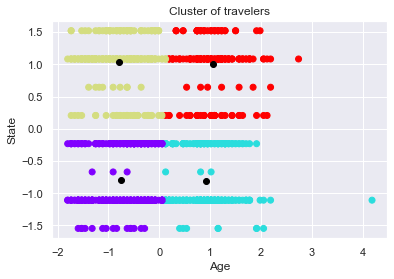

In [141]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of travelers')
plt.xlabel('Age')
plt.ylabel('State')
plt.show()

Kmean for NEP

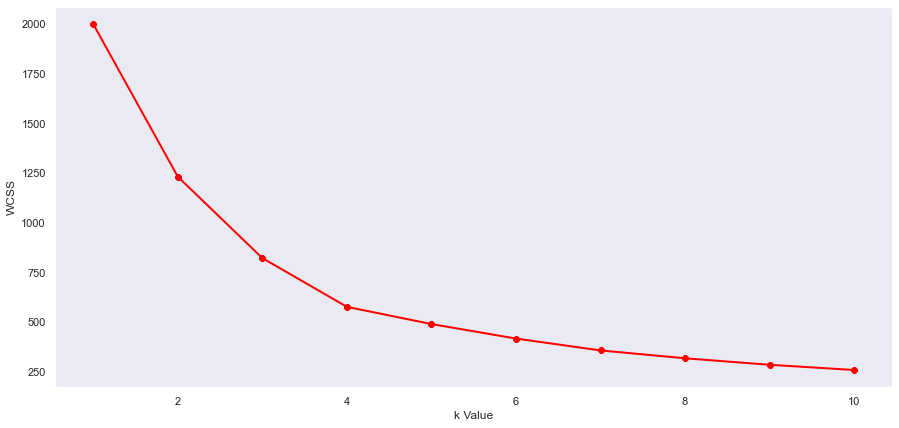

In [142]:
X1 = segmentation_std.loc[:, ["Age","NEP"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [143]:
kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(X1)
print(label)

[1 1 1 1 0 2 0 3 1 0 3 3 2 2 2 3 2 2 0 1 3 3 3 1 2 1 1 3 3 1 1 3 1 3 3 0 0
 0 1 0 1 3 3 3 3 3 3 1 1 2 1 1 3 2 3 2 0 2 3 0 0 2 2 2 0 0 3 2 0 2 1 3 2 2
 3 1 0 3 1 3 1 0 1 3 1 3 2 0 1 1 0 2 2 0 2 0 2 2 0 3 3 3 0 3 0 1 1 3 3 3 0
 1 0 3 3 3 1 0 3 3 0 1 2 2 2 1 1 3 1 3 1 3 3 2 2 0 1 3 0 1 0 0 1 1 0 2 1 1
 3 3 0 3 3 0 3 3 0 2 2 1 2 2 3 3 0 0 2 2 2 3 1 3 2 2 2 3 0 1 3 3 2 1 3 0 2
 3 0 0 0 3 3 0 0 0 2 1 1 0 3 0 3 0 1 0 1 2 3 0 0 2 1 2 0 1 0 1 2 1 0 1 1 3
 1 3 0 1 1 2 1 3 0 3 0 1 3 0 1 1 3 1 3 3 0 2 3 3 3 3 2 2 0 0 3 0 0 2 0 0 3
 1 0 3 2 3 3 2 1 2 0 2 3 3 3 0 0 2 2 0 3 3 1 3 3 0 3 3 1 0 3 0 3 1 3 2 0 1
 0 3 1 0 3 2 1 2 3 3 3 1 3 0 1 3 0 1 1 3 2 0 0 3 2 3 2 0 0 1 1 3 2 3 3 2 3
 3 3 3 1 2 1 3 1 0 2 1 0 3 3 0 1 0 0 2 3 2 0 0 0 1 0 1 3 1 3 0 1 3 2 3 0 0
 3 1 1 3 0 0 1 0 3 3 0 1 1 2 1 0 0 1 3 2 1 0 3 3 1 2 0 2 3 3 3 1 3 1 1 1 2
 0 1 1 2 1 3 2 1 3 3 2 2 2 2 0 1 2 1 2 3 1 2 0 1 2 3 3 2 0 3 3 3 3 3 2 2 2
 2 1 2 1 0 3 1 2 0 1 0 3 1 2 1 3 1 0 1 2 2 3 0 0 1 3 3 2 1 0 3 0 0 2 1 1 1
 3 1 1 3 3 1 2 0 3 2 1 0 

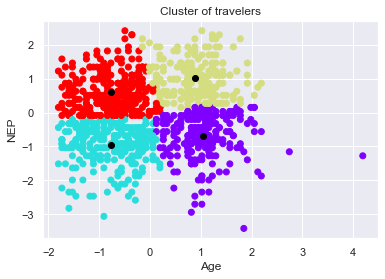

In [144]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of travelers')
plt.xlabel('Age')
plt.ylabel('NEP')
plt.show()

MinMaxScaler

In [145]:
mm = MinMaxScaler()
mm_data = mm.fit_transform(advance_data)
mm_data = pd.DataFrame(mm_data, columns=advance_data.columns)

Hierarchy


In [ ]:
hier_clust = linkage(mm_data, method='ward')
plt.figure(figsize= (12,9))
plt.title('Australian Travel Hierarchy')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
show_leaf_counts= False,
no_labels= True,
color_threshold=0)

In [147]:
mm_data= pd.DataFrame(mm_data)
print(mm_data.max())

Gender                 1.0
Age                    1.0
Education              1.0
Income                 1.0
Income2                1.0
Occupation             1.0
State                  1.0
Relationship.Status    1.0
Obligation             1.0
Obligation2            1.0
NEP                    1.0
Vacation.Behaviour     1.0
dtype: float64


K-means Obligation

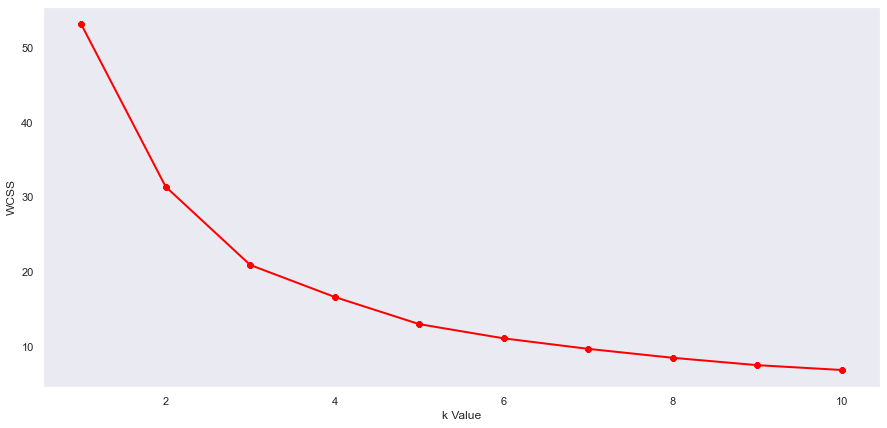

In [148]:
X1 = mm_data.loc[:, ["Age","Obligation"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [149]:
kmeans = KMeans(n_clusters= 3)
label = kmeans.fit_predict(X1)
print(label)

[1 2 1 2 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 2 1 2 1 1 1 1 2 1 1 2 0
 0 2 0 1 1 1 2 1 1 1 2 2 0 1 2 1 1 1 0 0 0 1 0 0 0 0 0 2 0 1 0 0 0 2 1 0 0
 2 2 0 1 2 1 1 0 1 1 1 1 0 0 2 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 2 2 1 1 1 0
 2 0 1 1 2 1 0 1 1 0 2 0 0 0 1 2 2 2 1 1 1 1 0 2 2 1 1 0 2 0 0 1 1 0 0 2 2
 1 1 0 1 1 0 1 2 2 0 0 2 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 2 0 1 1 1 0 2 1 0 0
 1 0 0 0 1 1 0 0 0 0 1 1 2 1 0 1 0 1 0 1 0 2 0 0 0 2 0 0 2 2 2 0 1 2 1 2 2
 1 1 0 1 1 0 2 1 0 2 0 2 1 0 2 2 1 1 2 1 0 0 2 2 1 1 0 0 2 0 1 0 0 0 0 0 1
 1 0 2 0 1 2 0 1 0 0 0 1 1 2 0 0 0 2 0 2 1 2 1 1 0 2 1 2 0 2 0 1 1 1 0 2 2
 2 1 1 0 1 2 1 0 2 1 1 2 1 0 2 2 0 2 2 1 0 0 0 2 0 1 0 0 0 2 2 1 0 2 1 1 1
 1 1 1 1 2 2 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 2 1 2 1 0 1 1 0 1 0 0
 1 1 1 1 0 0 1 0 1 2 0 2 1 0 1 0 0 2 1 0 2 2 1 1 1 0 0 0 1 1 2 1 2 1 2 2 2
 2 2 2 0 1 2 0 1 0 1 0 0 0 0 0 2 0 2 0 1 1 0 0 1 0 1 1 0 0 1 1 2 2 1 0 0 0
 0 2 0 1 2 2 1 0 0 1 0 2 2 0 2 1 1 0 2 0 0 2 0 0 2 1 2 0 2 0 1 0 0 1 2 2 2
 1 1 2 1 2 1 1 0 1 0 1 0 

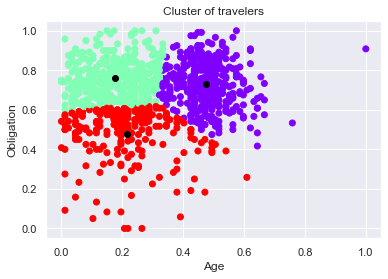

In [150]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of travelers')
plt.xlabel('Age')
plt.ylabel('Obligation')
plt.show()

K-mean for Obligation2

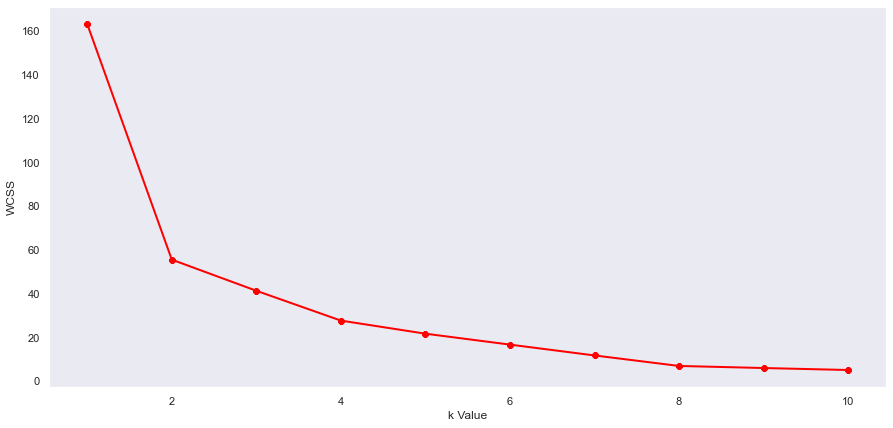

In [151]:
X1 = mm_data.loc[:, ["Age","Obligation2"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [152]:
kmeans = KMeans(n_clusters= 2)
label = kmeans.fit_predict(X1)
print(label)

[1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0
 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1
 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0
 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0
 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0
 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0
 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1
 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1
 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1
 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0
 1 1 0 1 0 0 1 0 0 1 1 0 

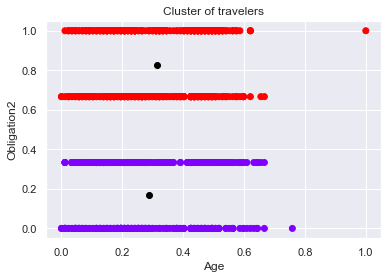

In [153]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of travelers')
plt.xlabel('Age')
plt.ylabel('Obligation2')
plt.show()

K-mean for NEP

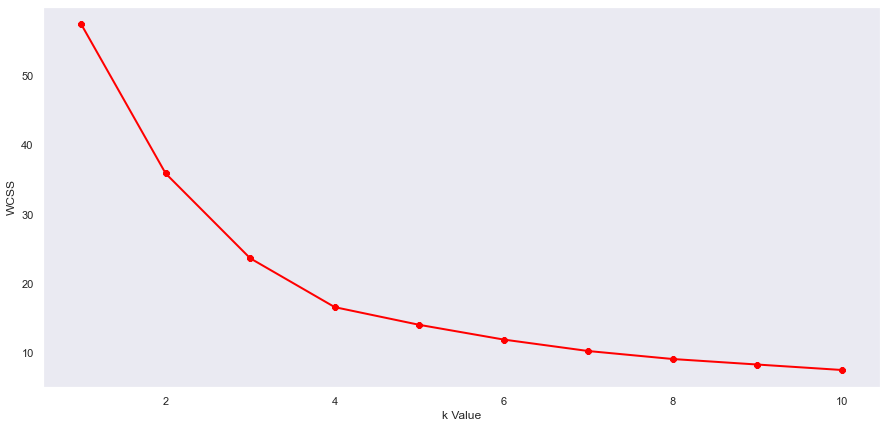

In [154]:
X1 = mm_data.loc[:, ["Age","NEP"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [155]:
kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(X1)
print(label)

[0 0 0 0 2 1 2 3 0 2 3 3 1 1 1 3 1 1 2 0 3 3 3 0 1 0 0 3 3 0 0 3 0 3 3 2 2
 2 0 2 3 3 3 3 3 3 3 0 2 1 0 0 3 1 3 1 2 1 3 2 2 1 1 1 2 2 3 1 2 1 0 3 1 1
 3 0 2 3 0 3 0 2 3 3 0 3 1 2 0 0 2 1 1 2 1 2 1 1 2 3 3 3 2 3 2 0 0 3 3 3 2
 0 2 3 3 1 0 2 3 3 2 0 1 1 1 0 0 3 0 3 0 3 3 1 1 2 0 1 2 0 2 2 0 0 2 1 0 0
 3 1 2 3 3 2 3 3 2 1 1 0 1 1 3 3 2 2 1 1 1 3 0 3 1 1 1 3 2 0 3 3 1 0 3 2 1
 3 2 2 2 3 3 2 2 2 1 0 0 2 3 2 3 2 0 2 0 1 3 2 2 1 0 1 2 0 2 0 1 0 2 0 0 3
 0 3 2 0 0 1 0 3 2 3 2 0 3 2 0 0 3 0 3 3 2 1 3 3 3 3 1 1 2 2 3 2 2 1 2 2 3
 0 2 3 1 3 3 1 0 1 2 1 3 3 3 2 2 2 1 2 1 3 0 1 3 2 3 3 0 2 3 2 3 0 3 1 2 0
 2 3 0 2 3 1 0 1 3 3 3 0 3 2 0 3 2 0 3 3 1 2 2 3 1 3 1 2 2 0 0 3 1 3 3 1 3
 3 3 3 0 1 0 1 0 2 1 3 2 3 3 2 0 2 2 1 3 1 2 2 2 3 2 0 3 0 3 2 0 3 1 3 2 2
 3 0 0 3 2 2 0 2 3 3 2 3 0 1 0 2 2 0 1 1 0 2 3 3 0 1 2 1 3 3 3 0 3 0 0 0 1
 2 0 0 1 0 3 1 0 3 3 1 2 1 1 2 0 1 0 1 3 0 1 2 0 1 3 3 1 2 3 3 3 3 3 1 1 1
 1 0 1 0 2 3 0 1 2 0 2 3 0 1 3 3 0 2 0 1 1 3 2 2 0 3 3 1 0 2 3 2 2 1 0 0 0
 3 0 0 3 3 0 1 2 3 1 0 2 

In [156]:
print(kmeans.cluster_centers_)

[[0.17137316 0.41656169]
 [0.43944992 0.76958819]
 [0.4751953  0.4696528 ]
 [0.16864581 0.67617246]]


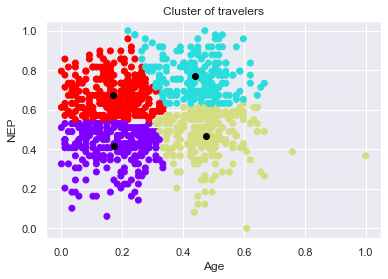

In [157]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of travelers')
plt.xlabel('Age')
plt.ylabel('NEP')
plt.show()

K-means State

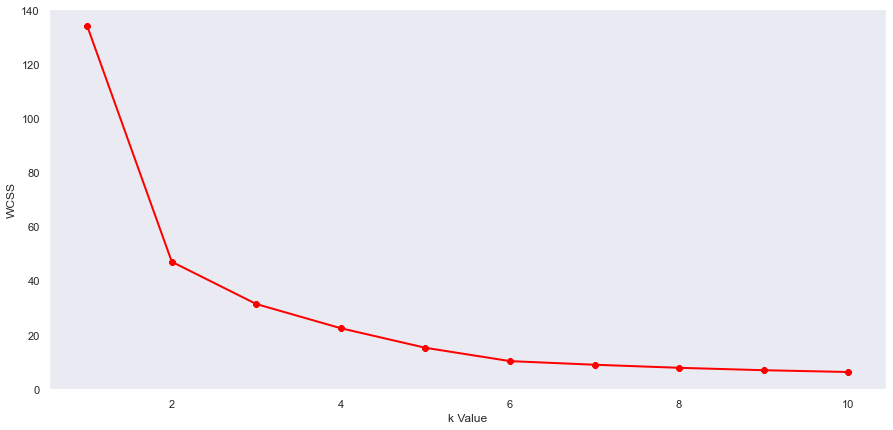

In [158]:
X1 = mm_data.loc[:, ["Age","State"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [159]:
kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(X1)
print(label)

[0 0 1 1 2 3 2 0 1 1 0 1 2 1 2 0 2 1 2 3 1 0 0 0 3 1 0 0 0 0 3 0 1 1 1 3 1
 1 1 1 1 1 3 3 3 1 1 3 1 1 1 1 3 1 0 3 2 1 1 3 3 2 1 2 1 3 0 2 1 1 1 1 3 1
 0 0 1 0 0 0 1 2 1 3 3 3 2 2 0 3 2 2 1 2 2 1 2 1 1 1 1 0 3 0 1 0 0 3 1 1 2
 1 1 3 1 3 1 3 1 1 1 0 1 2 3 0 0 0 0 1 0 3 3 3 1 1 3 3 2 0 1 3 0 1 3 2 0 0
 1 0 1 0 3 2 1 1 1 3 2 0 2 3 0 1 1 3 2 3 1 0 3 1 3 1 2 0 1 1 3 3 3 1 0 1 2
 1 1 3 1 0 1 3 2 1 2 0 1 1 1 2 1 1 0 2 1 1 1 3 3 3 1 2 2 3 2 1 3 1 1 1 1 1
 0 3 2 0 3 2 1 0 2 1 1 3 1 2 1 3 0 1 0 3 1 1 3 0 3 0 2 1 2 2 0 2 1 3 2 2 1
 0 1 3 1 3 1 1 3 3 2 3 1 3 1 2 2 1 2 2 1 0 1 1 0 2 3 1 3 2 3 1 3 1 1 1 1 3
 2 1 1 1 0 1 0 1 1 0 3 0 3 1 3 0 2 0 0 1 1 1 2 0 2 3 2 2 2 3 3 0 1 0 1 1 0
 0 0 3 1 3 0 1 0 3 2 3 3 0 0 3 3 3 2 3 0 2 3 1 3 0 1 1 1 3 3 1 0 0 3 3 3 1
 1 1 3 0 3 1 3 3 1 1 2 1 3 3 3 3 1 0 0 2 1 1 0 0 3 1 3 3 0 3 3 1 1 1 0 1 3
 2 3 0 3 3 1 3 3 2 3 1 2 2 3 1 1 2 0 1 3 3 2 1 0 2 0 0 2 2 1 1 3 1 0 2 3 2
 2 3 2 3 1 0 1 1 1 0 3 1 3 3 0 0 1 2 0 2 1 0 3 2 3 0 1 3 1 3 0 1 1 1 3 3 0
 0 3 0 3 3 0 1 2 3 3 1 2 

In [160]:
print(kmeans.cluster_centers_)

[[0.16243765 0.8861186 ]
 [0.29907595 0.13605442]
 [0.4772583  0.87905346]
 [0.30515526 0.46321962]]


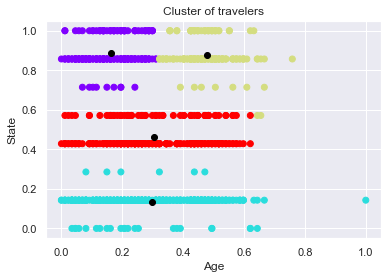

In [161]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of travelers')
plt.xlabel('Age')
plt.ylabel('State')
plt.show()

MaxAbsScaler

In [162]:
ma = MaxAbsScaler()
ma_data = ma.fit_transform(advance_data)
ma_data = pd.DataFrame(ma_data,columns=advance_data.columns)

Hierarchy

In [ ]:
hier_clust = linkage(ma_data, method='ward')
plt.figure(figsize= (12,9))
plt.title('Australian Travel Hierarchy')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
show_leaf_counts= False,
no_labels= True,
color_threshold=0)

In [164]:
ma_data= pd.DataFrame(ma_data)
print(ma_data.max())

Gender                 1.0
Age                    1.0
Education              1.0
Income                 1.0
Income2                1.0
Occupation             1.0
State                  1.0
Relationship.Status    1.0
Obligation             1.0
Obligation2            1.0
NEP                    1.0
Vacation.Behaviour     1.0
dtype: float64


Kmean Obligation

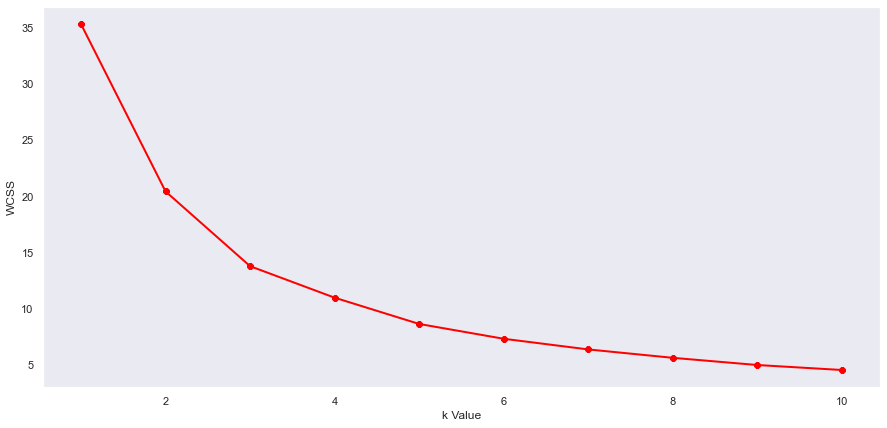

In [165]:
X2 = ma_data.loc[:, ["Age","Obligation"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [166]:
kmeans = KMeans(n_clusters= 3)
label = kmeans.fit_predict(X2)
print(label)

[2 0 2 0 1 1 1 2 2 1 2 2 1 1 1 2 1 1 1 2 2 2 2 2 1 0 2 0 2 2 2 2 0 2 2 0 1
 1 0 1 2 2 2 0 2 2 2 0 0 1 2 0 2 2 2 1 1 1 2 1 1 1 1 1 0 1 2 1 1 1 0 2 1 1
 0 0 1 2 0 2 2 1 2 2 2 2 1 1 0 2 1 1 1 1 1 1 1 2 1 2 2 2 1 2 1 0 0 2 2 2 1
 0 1 2 2 0 2 1 2 2 1 0 1 1 1 2 0 0 0 2 2 2 2 1 1 0 2 2 1 0 1 1 2 2 1 1 0 0
 2 2 1 2 2 1 2 0 0 1 1 0 1 1 2 2 1 1 1 1 1 2 2 2 1 2 1 0 1 2 2 2 1 0 2 1 1
 2 1 1 1 2 2 1 1 1 1 2 2 0 2 1 2 1 2 1 2 1 0 1 1 1 0 1 1 0 0 0 1 2 0 2 0 0
 2 2 1 2 2 1 0 2 1 0 1 0 2 1 0 0 2 2 0 2 1 1 0 0 2 2 1 1 0 1 2 1 1 1 1 1 2
 2 1 0 1 2 0 1 2 1 1 1 2 2 0 1 1 1 0 1 0 2 0 2 2 1 0 2 0 1 0 1 2 2 2 1 0 0
 0 2 2 1 2 0 2 1 0 2 2 0 2 1 0 0 1 0 0 2 1 1 1 0 1 2 1 1 1 0 0 2 1 0 2 2 2
 2 2 2 2 0 0 2 2 1 1 2 1 2 2 1 2 1 1 1 2 1 1 1 1 2 1 0 2 0 2 1 2 2 1 2 1 1
 2 2 2 2 1 1 2 1 2 0 1 0 2 1 2 1 1 0 2 1 0 0 2 2 2 1 1 1 2 2 0 2 0 2 0 0 0
 0 0 0 1 2 0 1 2 1 2 1 1 1 1 1 0 1 0 1 2 2 1 1 2 1 2 2 1 1 2 2 0 0 2 1 1 1
 1 0 1 2 0 0 2 1 1 2 1 0 0 1 0 2 2 1 0 1 1 0 1 1 0 2 0 1 0 1 2 1 1 2 0 0 0
 2 2 0 2 0 2 2 1 2 1 2 1 

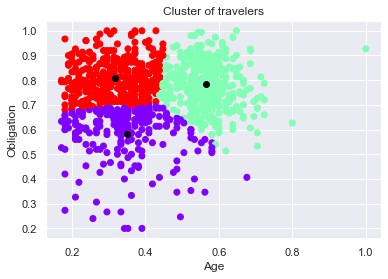

In [167]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of travelers')
plt.xlabel('Age')
plt.ylabel('Obligation')
plt.show()

K-mean for Obligation2

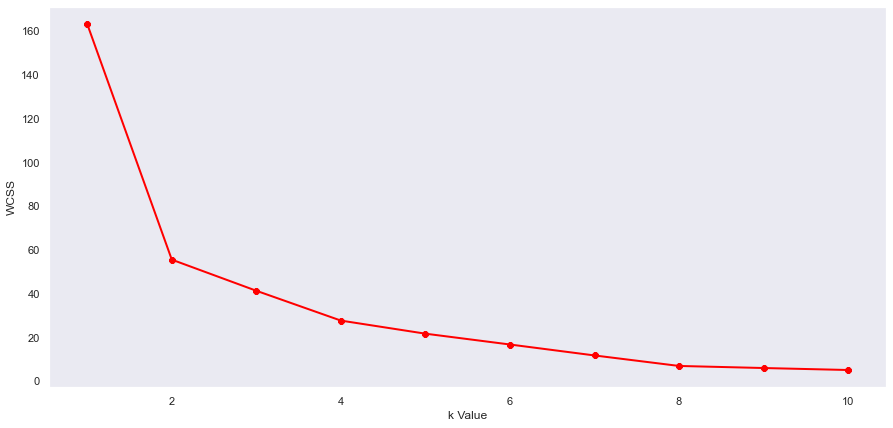

In [168]:
X1 = mm_data.loc[:, ["Age","Obligation2"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [169]:
kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(X2)
print(label)

[2 1 1 1 0 3 0 2 2 3 2 2 3 3 3 2 0 3 3 2 2 2 2 2 3 1 2 1 2 2 2 2 1 2 2 0 0
 3 1 0 2 2 2 1 2 2 2 1 0 0 2 1 2 3 2 3 0 3 2 0 0 0 3 0 1 3 2 3 0 0 1 2 0 3
 1 1 0 2 1 2 2 3 2 2 2 2 0 3 1 2 0 0 3 0 0 0 0 3 0 2 2 2 3 2 3 1 1 2 2 2 0
 1 3 2 2 1 2 3 2 2 3 1 3 3 3 2 1 1 1 2 2 2 2 3 0 0 2 3 0 1 0 3 2 2 0 3 1 1
 2 2 3 2 2 0 2 1 0 0 0 1 3 3 2 2 0 3 3 3 0 2 2 2 3 3 3 1 3 2 2 2 3 1 2 0 0
 2 3 0 3 2 2 0 3 0 3 0 2 0 2 0 2 0 2 3 2 3 1 0 3 3 1 3 0 1 0 1 3 2 1 2 2 1
 2 2 3 2 3 0 1 2 0 1 0 1 2 0 1 1 2 2 1 2 0 3 1 1 2 2 3 3 0 3 2 3 3 3 0 0 2
 2 0 1 3 2 1 3 2 3 3 3 2 2 1 3 3 0 0 3 1 2 1 2 2 0 1 2 1 3 1 3 2 2 2 0 0 1
 0 2 2 3 2 0 2 0 1 2 2 1 2 3 1 1 3 1 1 2 0 0 0 1 0 2 3 3 0 1 1 2 0 1 2 3 2
 2 2 2 2 1 1 2 1 0 0 2 0 2 2 0 2 0 0 3 2 3 3 0 3 2 0 1 2 1 2 3 2 2 0 2 3 3
 2 2 2 2 3 3 2 0 2 1 0 1 2 3 2 3 3 1 2 3 1 0 2 2 2 0 0 3 2 2 1 2 1 3 1 1 0
 0 1 1 3 2 1 3 2 3 2 3 0 3 3 3 1 3 1 0 2 2 3 3 2 0 2 2 3 0 2 2 1 1 2 3 3 3
 3 1 3 2 0 1 3 3 0 2 3 1 1 3 1 2 2 3 1 3 3 1 0 3 1 2 2 0 1 0 2 3 3 3 1 1 1
 2 3 1 2 1 2 3 0 2 3 2 0 

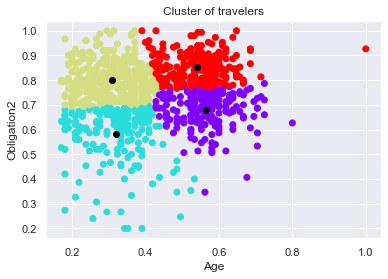

In [170]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of travelers')
plt.xlabel('Age')
plt.ylabel('Obligation2')
plt.show()

K-mean for State

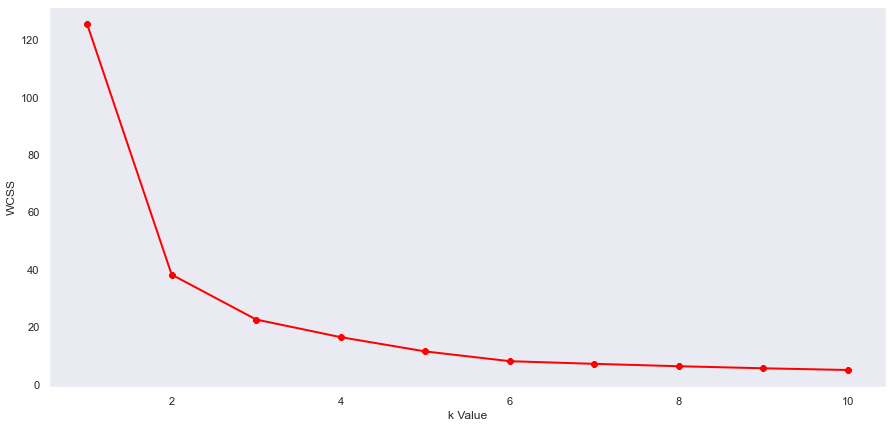

In [171]:
X2 = ma_data.loc[:, ["Age","State"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [172]:
kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(X2)
print(label)

[3 3 2 2 0 1 0 3 2 2 3 2 1 2 0 3 0 2 0 1 2 3 3 3 1 2 3 3 3 3 1 3 2 2 2 1 2
 2 2 2 2 2 1 1 1 2 2 1 2 2 2 2 1 2 3 1 0 2 2 1 1 0 2 0 2 1 3 0 2 2 2 2 1 2
 3 3 2 3 3 3 2 0 2 1 1 1 0 0 3 1 0 0 2 0 0 2 0 2 2 2 2 3 1 3 2 3 3 1 2 2 0
 2 2 1 2 1 2 1 2 2 2 3 2 0 1 3 3 3 3 2 3 1 1 1 2 2 1 1 0 3 2 1 3 2 1 0 3 3
 2 3 2 3 1 0 2 2 2 1 0 3 0 1 3 2 2 1 0 1 2 3 1 2 1 2 0 3 2 2 1 1 1 2 3 2 0
 2 2 1 2 3 2 1 0 2 0 3 2 2 2 0 2 2 3 0 2 2 2 1 1 1 2 0 0 1 0 2 1 2 2 2 2 2
 3 1 0 3 1 0 2 3 0 2 2 1 2 0 2 1 3 2 3 1 2 2 1 3 1 3 0 2 0 0 3 0 2 1 0 1 2
 3 2 1 2 1 2 2 1 1 0 1 2 1 2 0 0 2 0 0 2 3 2 2 3 0 1 2 1 0 1 2 1 2 2 2 2 1
 0 2 2 2 3 2 3 2 2 3 1 3 1 2 1 3 0 3 3 2 2 2 0 3 0 1 0 0 0 1 1 3 2 3 2 2 3
 3 3 1 2 1 3 2 3 1 0 1 1 3 3 1 1 1 0 1 3 0 1 2 1 3 2 2 2 1 1 2 3 3 1 1 1 2
 2 2 1 3 1 2 1 1 2 2 0 2 1 1 1 1 2 3 3 0 2 2 3 3 1 2 1 1 3 1 1 2 2 2 3 2 1
 0 1 3 1 1 2 1 1 0 1 2 0 0 1 2 2 0 3 2 1 1 0 2 3 0 3 3 0 0 2 2 1 2 3 0 1 0
 0 1 0 1 2 3 2 2 2 3 1 2 1 1 3 3 2 0 3 0 2 3 1 0 1 3 2 1 2 1 3 2 2 2 1 1 3
 3 1 3 1 1 3 2 0 1 1 2 0 

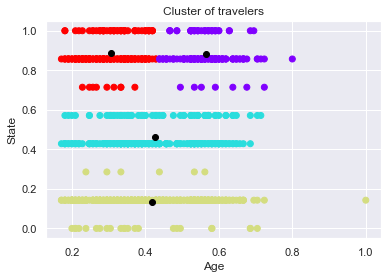

In [173]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of travelers')
plt.xlabel('Age')
plt.ylabel('State')
plt.show()

K-mean of NEP

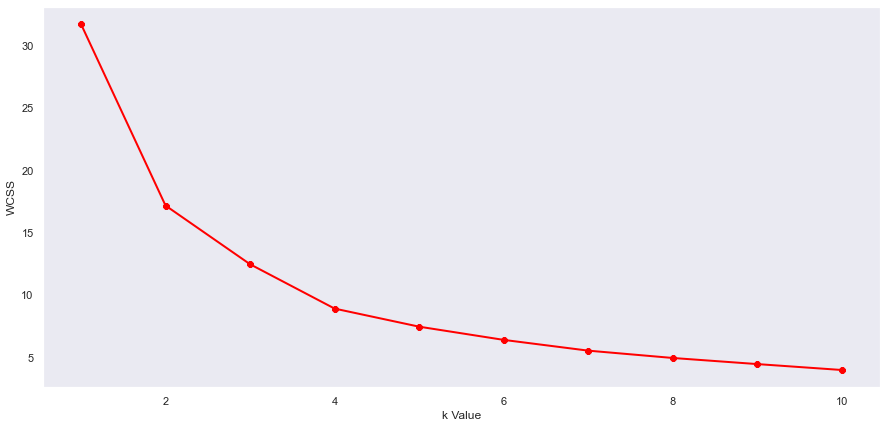

In [174]:
X2 = ma_data.loc[:, ["Age","NEP"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [175]:
kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(X2)
print(label)

[1 1 1 1 0 3 0 2 1 0 2 2 3 3 3 2 3 3 0 1 2 2 2 1 3 1 1 2 2 1 1 2 1 2 2 0 0
 0 1 0 1 2 2 2 2 2 2 1 1 3 1 1 2 3 2 3 0 3 2 0 0 3 3 3 0 0 2 3 0 3 1 2 3 3
 2 1 0 2 1 2 1 0 1 2 1 2 3 0 1 1 0 3 3 0 3 0 3 3 0 2 2 2 0 2 0 1 1 2 2 2 0
 1 0 2 2 2 1 0 2 2 0 1 3 3 3 1 1 2 1 2 1 2 2 3 3 0 1 2 0 1 0 0 1 1 0 3 1 1
 2 2 0 2 2 0 2 2 0 3 3 1 3 3 2 2 0 0 3 3 3 2 1 2 3 3 3 2 0 1 2 2 3 1 2 0 3
 2 0 0 0 2 2 0 0 0 3 1 1 0 2 0 2 0 1 0 1 3 2 0 0 3 1 3 0 1 0 1 3 1 0 1 1 2
 1 2 0 1 1 3 1 2 0 2 0 1 2 0 1 1 2 1 2 2 0 3 2 2 2 2 3 3 0 0 2 0 0 3 0 0 2
 1 0 2 3 2 2 3 1 3 0 3 2 2 2 0 0 3 3 0 2 2 1 2 2 0 2 2 1 0 2 0 2 1 2 3 0 1
 0 2 1 0 2 3 1 3 2 2 2 1 2 0 1 2 0 1 1 2 3 0 0 2 3 2 3 0 0 1 1 2 3 2 2 3 2
 2 2 2 1 3 1 2 1 0 3 1 0 2 2 0 1 0 0 3 2 3 0 0 0 1 0 1 2 1 2 0 1 2 3 2 0 0
 2 1 1 2 0 0 1 0 2 2 0 1 1 3 1 0 0 1 2 3 1 0 2 2 1 3 0 3 2 2 2 1 2 1 1 1 3
 0 1 1 3 1 2 3 1 3 2 3 3 3 3 0 1 3 1 3 2 1 3 0 1 3 2 2 3 0 2 2 2 2 2 3 3 3
 3 1 3 1 0 2 1 3 0 1 0 2 1 3 1 2 1 0 1 3 3 2 0 0 1 2 2 3 1 0 2 0 0 3 1 1 1
 2 1 1 2 2 1 3 0 2 3 1 0 

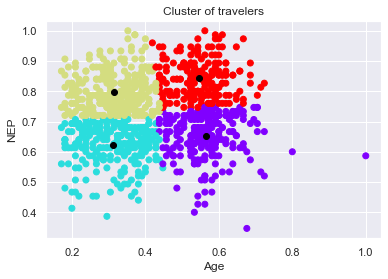

In [176]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of travelers')
plt.xlabel('Age')
plt.ylabel('NEP')
plt.show()

RobustScaler

In [177]:
rs = RobustScaler()
rs_data = rs.fit_transform(advance_data)
rs_data = pd.DataFrame(rs_data, columns = advance_data.columns)

Hierarchy

In [ ]:
hier_clust = linkage(rs_data, method='ward')
plt.figure(figsize= (12,9))
plt.title('Australian Travel Hierarchy')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
show_leaf_counts= False,
no_labels= True,
color_threshold=0)

In [179]:
rs_data= pd.DataFrame(rs_data)
print(rs_data.max())

Gender                 0.000000
Age                    2.520000
Education              0.500000
Income                 2.000000
Income2                1.000000
Occupation             2.000000
State                  0.800000
Relationship.Status    3.000000
Obligation             1.440000
Obligation2            1.000000
NEP                    1.666667
Vacation.Behaviour     2.124600
dtype: float64


K-mean Obligation

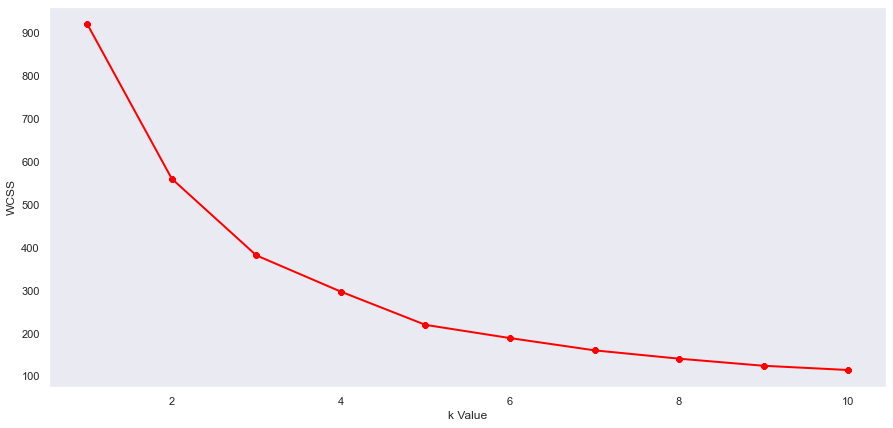

In [180]:
X2 = rs_data.loc[:, ["Age","Obligation"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [181]:
kmeans = KMeans(n_clusters= 5)
label = kmeans.fit_predict(X2)
print(label)

[0 1 1 4 3 2 3 0 1 2 0 0 2 2 2 1 3 2 2 0 1 1 0 0 2 1 0 1 1 1 1 0 1 1 0 3 3
 2 4 3 0 1 1 1 0 0 0 1 1 3 1 1 1 2 0 2 3 2 0 3 3 3 3 3 4 2 1 2 3 3 1 0 3 2
 1 1 3 0 1 0 0 2 0 0 0 0 3 2 1 0 3 3 2 3 3 3 3 2 3 1 0 1 2 0 2 1 1 0 0 1 3
 1 2 0 1 4 0 2 1 0 2 1 2 2 2 0 4 1 4 0 0 1 0 2 3 3 1 0 3 1 3 2 0 0 3 2 4 1
 1 0 2 1 0 3 0 1 1 3 3 4 2 2 0 1 3 2 2 2 3 0 0 0 2 2 2 4 2 0 0 0 2 1 1 3 3
 0 2 3 2 1 1 3 2 3 2 1 1 4 0 3 0 3 0 2 1 3 1 3 2 2 1 2 3 1 3 1 2 0 4 1 1 1
 0 0 2 0 0 3 4 0 3 1 3 1 1 3 4 1 1 0 1 0 3 2 1 1 1 1 2 2 3 2 0 2 2 2 3 3 0
 0 3 1 2 0 1 2 0 2 2 2 0 0 1 2 2 3 4 2 1 0 4 0 0 3 4 0 4 2 1 2 0 0 0 3 3 1
 3 1 1 2 0 3 0 3 4 0 1 1 0 2 1 1 2 4 1 1 3 3 3 1 3 0 2 2 3 1 1 1 3 1 0 2 0
 0 0 0 0 1 4 0 1 3 3 0 3 0 0 3 1 3 3 2 0 2 2 3 2 0 3 1 1 1 0 2 1 0 3 0 2 2
 1 0 0 0 2 2 0 3 0 4 3 1 1 2 1 2 2 1 1 2 1 3 0 1 1 3 3 2 0 1 1 1 4 0 4 1 1
 3 1 1 2 1 1 2 1 2 0 2 3 2 2 2 1 2 1 3 0 0 2 2 1 3 1 0 2 3 0 1 1 4 0 2 2 2
 2 1 2 0 3 1 2 2 3 1 2 1 1 2 4 0 1 2 1 2 2 1 3 2 4 1 1 3 1 3 0 2 2 2 4 1 4
 0 2 4 0 1 1 2 3 1 2 0 3 

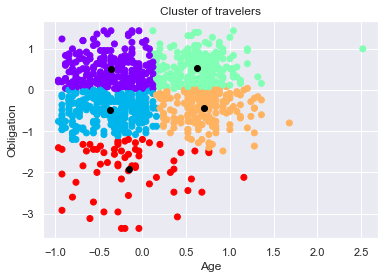

In [182]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of travelers')
plt.xlabel('Age')
plt.ylabel('Obligation')
plt.show()

Kmean for Obligation2

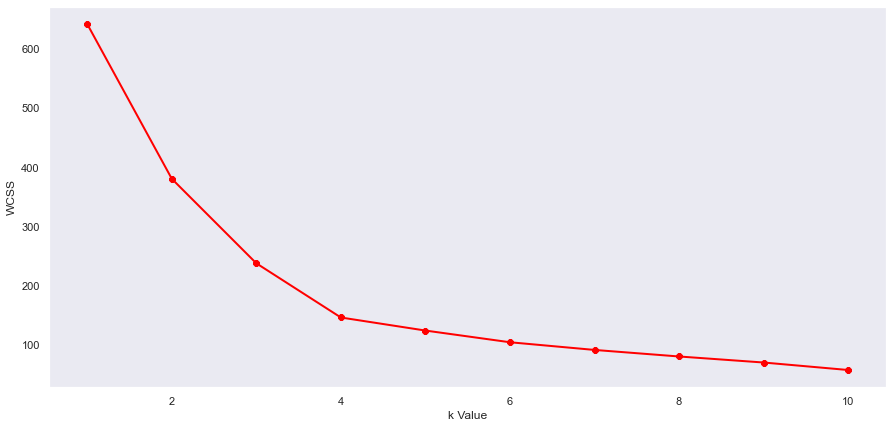

In [183]:
X2 = rs_data.loc[:, ["Age","Obligation2"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [184]:
kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(X2)
print(label)

[3 0 0 0 2 1 2 3 0 1 3 3 1 1 1 0 2 1 1 3 0 0 3 3 1 0 3 0 0 0 0 3 0 0 3 2 2
 1 0 2 3 0 0 0 3 3 3 0 0 2 0 0 0 1 3 1 2 1 3 2 2 2 1 1 2 1 0 1 2 2 0 3 1 1
 0 0 2 3 0 3 3 1 3 3 3 3 2 1 0 3 2 2 1 2 2 2 2 1 1 0 3 0 1 3 1 0 0 3 3 0 2
 0 1 3 0 0 3 1 0 3 1 0 1 1 1 3 0 0 0 3 3 0 3 1 2 2 0 3 2 0 2 1 3 3 2 1 0 0
 0 3 1 0 3 2 3 0 2 2 2 0 1 1 3 0 2 1 1 1 2 3 3 3 1 1 1 0 1 3 3 3 1 0 0 2 2
 3 1 2 1 0 0 2 1 2 1 0 0 2 3 2 3 2 3 1 0 1 0 2 1 1 0 1 2 0 2 0 1 3 2 0 0 0
 3 3 1 3 3 2 2 3 2 0 2 0 0 2 0 0 0 3 0 3 2 1 0 0 0 0 1 1 2 1 3 1 1 1 2 2 3
 3 2 0 1 3 0 1 3 1 1 1 3 3 0 1 1 2 2 1 0 3 0 3 3 2 0 3 0 1 0 1 3 3 3 2 2 0
 2 0 0 1 3 2 3 2 0 3 0 0 3 1 0 0 1 0 0 0 2 2 2 0 2 3 1 1 2 0 0 0 2 0 3 1 3
 3 3 3 3 2 0 3 0 2 2 3 2 3 3 2 0 2 2 1 3 1 1 2 1 3 2 0 0 0 3 1 0 3 2 3 1 1
 0 3 3 3 1 1 3 2 3 0 2 0 0 1 0 1 1 0 0 1 0 2 3 0 0 2 1 1 3 0 0 0 0 3 0 0 2
 2 0 0 1 0 0 1 0 1 3 1 2 1 1 1 0 1 0 2 3 3 1 1 0 2 0 3 1 2 3 0 0 0 3 1 1 1
 1 0 1 3 2 0 1 1 2 0 1 0 0 1 0 3 0 1 0 1 1 0 2 1 0 0 0 2 0 2 3 1 1 1 0 0 0
 3 1 0 3 0 0 1 2 0 1 3 2 

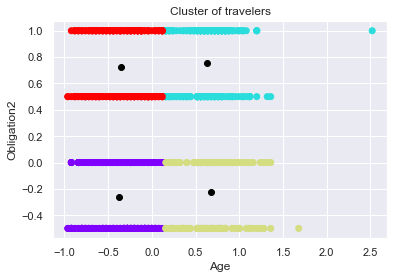

In [185]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of travelers')
plt.xlabel('Age')
plt.ylabel('Obligation2')
plt.show()

K-mean State

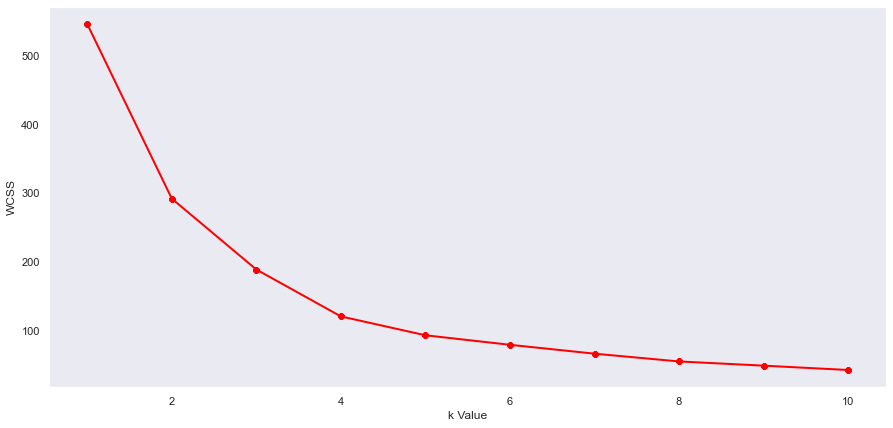

In [186]:
X2 = rs_data.loc[:, ["Age","State"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [187]:
kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(X2)
print(label)

[3 3 1 1 2 0 2 3 1 0 3 1 2 0 2 3 2 0 2 1 1 3 3 3 2 1 3 3 3 3 1 3 1 1 1 0 0
 0 1 0 1 1 1 3 1 1 1 3 1 0 1 1 1 0 3 0 2 0 1 2 0 2 0 2 0 2 3 2 0 0 1 1 0 0
 3 3 0 3 3 3 1 2 1 1 1 1 2 2 3 1 2 2 0 2 2 0 2 0 0 1 1 3 2 3 0 3 3 1 1 1 2
 1 0 3 1 3 1 2 1 1 0 3 0 2 2 3 3 3 3 1 3 1 1 0 0 0 1 3 2 3 0 0 3 1 0 2 3 3
 1 3 0 3 1 2 1 1 0 0 2 3 2 0 3 1 0 0 2 0 0 3 1 1 0 0 2 3 0 1 1 1 0 1 3 0 2
 1 0 0 0 3 1 2 2 0 2 3 1 0 1 2 1 0 3 2 1 0 1 0 0 0 1 2 2 3 2 1 2 1 0 1 1 1
 3 1 2 3 3 2 0 3 2 1 0 1 1 2 1 1 3 1 3 3 0 0 1 3 3 3 2 0 2 2 3 2 0 0 2 2 1
 3 0 1 0 1 1 0 1 0 2 0 1 1 1 2 2 0 2 2 1 3 1 1 3 2 1 1 1 2 1 0 1 1 1 0 0 1
 2 1 1 0 3 0 3 0 1 3 1 3 1 0 3 3 2 3 3 1 0 0 2 3 2 3 2 2 2 1 1 3 0 3 1 0 3
 3 3 1 1 0 3 1 3 2 2 1 2 3 3 0 1 0 2 0 3 2 0 0 0 3 0 1 1 1 1 0 3 3 0 1 2 0
 1 1 1 3 2 0 3 2 1 1 2 1 1 0 1 0 0 3 3 2 1 0 3 3 1 0 0 0 3 3 1 1 1 1 3 1 0
 2 1 3 0 1 1 0 3 2 3 0 2 2 0 0 1 2 3 0 1 1 2 0 3 2 3 3 2 2 1 1 1 1 3 2 2 2
 2 1 2 1 0 3 0 0 0 3 2 1 1 2 3 3 1 2 3 2 0 3 0 2 1 3 1 0 1 0 3 0 0 0 1 1 3
 3 0 3 3 3 3 0 2 3 2 1 2 

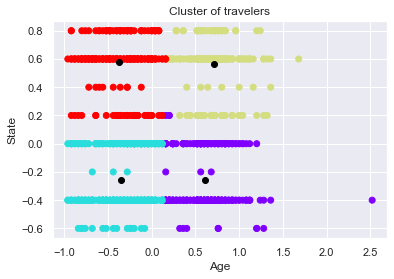

In [188]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of travelers')
plt.xlabel('Age')
plt.ylabel('State')
plt.show()

K-mean NEP

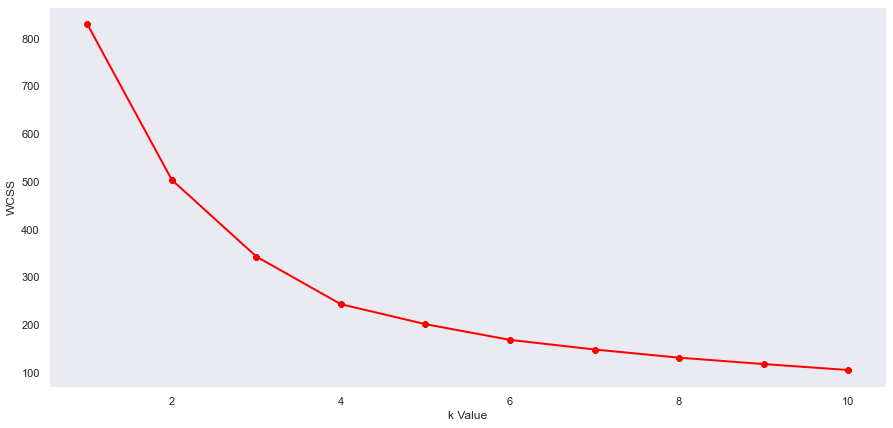

In [189]:
X2 = rs_data.loc[:, ["Age","NEP"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [190]:
kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(X2)
print(label)

[2 2 2 2 1 0 1 3 2 1 3 3 0 0 0 3 0 0 1 2 3 3 3 2 0 2 2 3 3 2 2 3 2 3 3 1 1
 1 2 1 3 3 3 3 3 3 3 2 1 0 2 2 3 0 3 0 1 0 3 1 1 0 0 0 1 1 3 0 1 0 2 3 0 0
 3 2 1 3 2 3 2 1 3 3 2 3 0 1 2 2 1 0 0 1 0 1 0 0 1 3 3 3 1 3 1 2 2 3 3 3 1
 2 1 0 3 0 2 1 3 3 1 2 0 0 0 2 2 3 2 3 2 3 3 0 0 1 2 0 1 2 1 1 2 2 1 0 2 2
 3 0 1 3 3 1 3 3 1 0 0 2 0 0 3 3 1 1 0 0 0 3 2 3 0 0 0 3 1 2 3 3 0 2 3 1 0
 0 1 1 1 3 3 1 1 1 0 2 2 1 0 1 3 1 2 1 2 0 3 1 1 0 2 0 1 2 1 2 0 2 1 2 2 3
 2 3 1 2 2 0 2 3 1 3 1 2 3 1 2 2 3 2 3 3 1 0 3 3 3 3 0 0 1 1 3 1 1 0 1 1 3
 2 1 3 0 3 3 0 2 0 1 0 3 3 3 1 1 1 0 1 0 3 2 0 3 1 3 3 2 1 3 1 3 2 3 0 1 2
 1 3 2 1 3 0 2 0 3 3 3 2 3 1 2 3 1 2 3 3 0 1 1 3 0 3 0 1 1 2 2 3 0 3 3 0 3
 3 3 3 2 0 2 0 2 1 0 3 1 3 3 1 2 1 1 0 3 0 1 1 1 3 1 2 3 2 3 1 2 3 0 3 1 1
 3 2 2 3 1 1 2 1 3 3 1 3 2 0 2 1 1 2 0 0 2 1 3 3 2 0 1 0 3 3 3 2 3 2 2 2 0
 1 2 2 0 2 3 0 2 3 3 0 1 0 0 1 2 0 2 0 3 2 0 1 2 0 3 3 0 1 3 3 3 3 0 0 0 0
 0 2 0 2 1 3 1 0 1 2 1 3 2 0 3 3 2 1 2 0 0 3 1 1 2 3 3 0 2 1 3 1 1 0 2 2 2
 3 2 2 3 3 2 3 1 3 0 2 1 

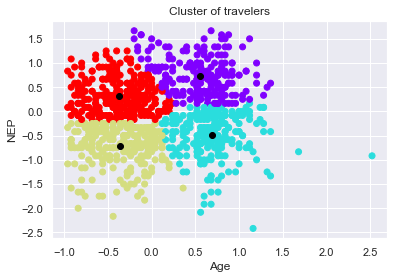

In [191]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of travelers')
plt.xlabel('Age')
plt.ylabel('NEP')
plt.show()

Quantile Transfrom

In [192]:
qt_u = QuantileTransformer(output_distribution='uniform')
qtu_data = qt_u.fit_transform(advance_data)
qtu_data = pd.DataFrame(qtu_data,columns=advance_data.columns)

K-mean Obligation

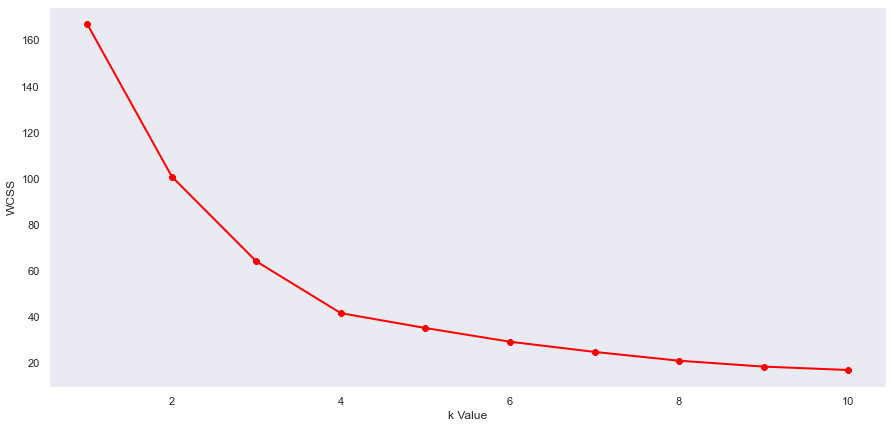

In [193]:
X2 = qtu_data.loc[:, ["Age","Obligation"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [194]:
kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(X2)
print(label)

[2 1 1 1 0 3 0 2 1 3 2 2 3 3 3 1 0 3 3 2 0 2 2 2 3 0 2 1 1 0 1 2 1 1 2 0 0
 3 1 0 2 1 1 1 2 2 2 1 0 0 1 1 1 3 2 3 0 3 2 0 0 0 0 0 0 3 1 3 0 0 1 2 3 3
 1 1 0 2 1 2 2 3 2 2 2 2 0 3 1 2 0 0 3 0 0 0 0 3 0 1 2 1 3 2 3 1 1 2 2 1 0
 1 3 2 1 1 2 3 1 2 3 1 3 3 3 2 1 1 1 2 2 1 2 3 0 0 1 3 0 1 0 3 2 2 0 3 1 1
 1 2 3 2 3 0 2 1 0 0 0 1 3 3 2 1 0 3 3 3 0 2 2 2 3 3 3 1 3 2 2 2 3 1 0 0 0
 2 3 0 3 1 2 0 3 0 3 0 1 0 2 0 2 0 2 3 1 0 1 0 3 3 1 3 0 1 0 1 3 2 0 0 1 1
 2 2 3 2 3 0 0 2 0 1 0 1 1 0 1 1 0 2 1 2 0 3 1 0 1 1 3 3 0 3 2 3 3 3 0 0 2
 2 0 1 3 2 1 3 2 3 3 3 2 2 1 3 3 0 0 3 1 2 1 2 2 0 1 2 1 3 1 3 2 3 2 0 0 1
 0 1 1 3 2 0 2 0 1 2 1 1 2 3 1 1 3 1 0 1 0 0 0 1 0 2 3 3 0 0 1 0 0 1 2 3 2
 2 2 2 2 0 1 2 1 0 0 2 0 2 2 0 1 0 0 3 2 3 3 0 3 2 0 1 1 1 2 3 1 2 0 2 3 3
 1 2 2 2 3 3 2 0 2 1 0 1 0 3 1 3 3 1 0 3 1 0 2 1 1 0 0 3 2 1 1 2 1 3 1 1 0
 0 1 1 3 1 1 3 1 3 2 3 0 3 3 3 1 3 1 0 3 3 3 3 1 0 1 2 3 0 2 1 1 1 2 3 3 3
 3 1 3 2 0 1 3 3 0 1 3 1 1 3 1 2 0 3 1 3 3 1 0 3 1 1 1 0 1 0 2 3 3 3 1 1 1
 2 3 1 2 1 1 3 0 1 3 2 0 

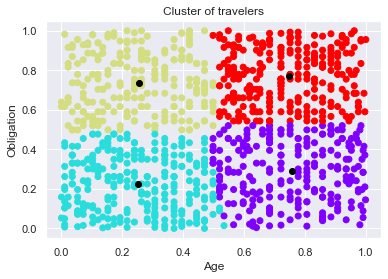

In [195]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of travelers')
plt.xlabel('Age')
plt.ylabel('Obligation')
plt.show()

K-mean Obligation2

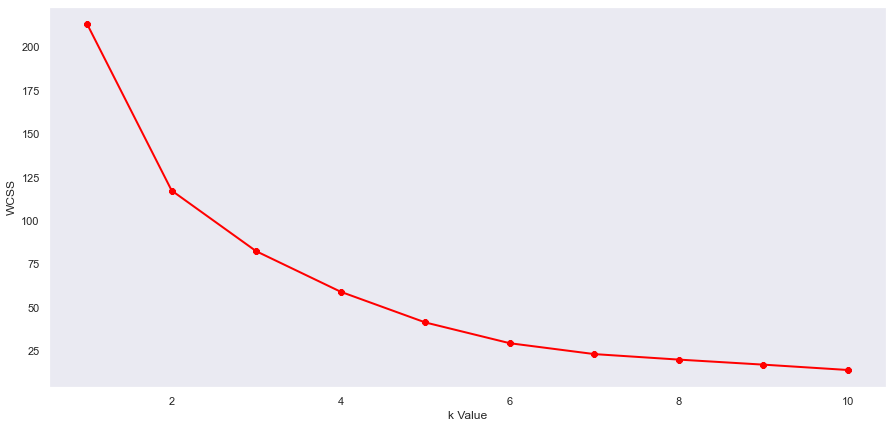

In [196]:
X2 = qtu_data.loc[:, ["Age","Obligation2"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [197]:
kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(X2)
print(label)

[0 3 3 3 1 2 1 0 3 2 0 0 2 2 2 3 1 2 2 0 1 3 0 0 2 1 0 3 3 1 3 0 3 3 0 1 1
 2 3 1 0 3 3 3 0 0 0 3 1 1 3 3 3 2 0 2 1 2 0 1 1 1 2 2 1 2 3 2 1 1 3 0 2 2
 3 3 1 0 3 0 0 2 0 0 0 0 1 2 3 0 1 1 2 1 1 1 1 2 2 3 0 3 2 0 2 3 3 0 0 3 1
 3 2 0 3 3 0 2 3 0 2 3 2 2 2 0 3 3 3 0 0 3 0 2 1 1 3 2 1 3 1 2 0 0 1 2 3 3
 3 0 2 3 2 1 0 3 1 1 1 3 2 2 0 3 1 2 2 2 1 0 0 0 2 2 2 3 2 0 0 0 2 3 1 1 1
 0 2 1 2 3 3 1 2 1 2 1 3 1 0 1 0 1 0 2 3 2 3 1 2 2 3 2 1 3 1 3 2 0 1 1 3 3
 0 0 2 0 2 1 1 0 1 3 1 3 3 1 3 3 1 0 3 0 1 2 3 1 3 3 2 2 1 2 0 2 2 2 1 1 0
 0 1 3 2 0 3 2 0 2 2 2 0 0 3 2 2 1 1 2 3 0 3 0 0 1 1 0 3 2 3 2 0 2 0 1 1 3
 1 3 3 2 0 1 0 1 3 0 3 3 0 2 3 3 2 3 1 3 1 1 1 3 1 0 2 2 1 1 3 1 1 3 0 2 0
 0 0 0 0 1 3 0 3 1 1 0 1 0 0 1 3 1 1 2 0 2 2 1 2 0 1 1 3 3 0 2 3 0 1 0 2 2
 3 0 0 0 2 2 0 1 0 3 1 3 1 2 3 2 2 3 1 2 3 1 0 3 3 1 2 2 0 3 3 3 3 2 3 3 1
 1 3 3 2 3 3 2 3 2 0 2 1 2 2 2 3 2 3 1 2 2 2 2 3 1 3 0 2 1 0 3 3 3 0 2 2 2
 2 3 2 0 1 3 2 2 1 3 2 3 3 2 3 0 1 2 3 2 2 3 1 2 3 3 3 1 3 1 0 2 2 2 3 3 3
 0 2 3 0 3 3 2 1 3 2 0 1 

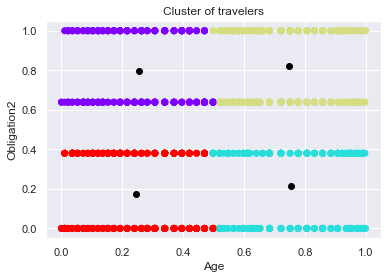

In [198]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of travelers')
plt.xlabel('Age')
plt.ylabel('Obligation2')
plt.show()

State

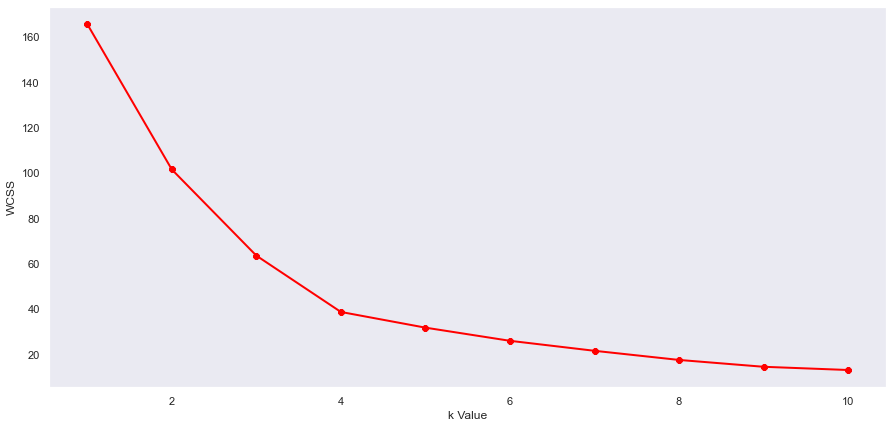

In [199]:
X2 = qtu_data.loc[:, ["Age","State"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [200]:
kmeans = KMeans(n_clusters= 8)
label = kmeans.fit_predict(X2)
print(label)

[2 2 7 7 0 3 3 5 1 6 2 1 3 1 0 5 0 1 0 7 1 5 2 5 3 1 2 5 2 5 4 5 1 1 7 3 6
 6 7 6 7 7 4 4 7 7 1 4 1 6 7 7 4 1 2 3 0 6 7 3 3 0 6 0 1 3 2 0 1 6 7 7 3 6
 5 2 6 5 5 5 7 0 7 4 4 4 0 0 5 4 3 0 6 5 0 6 0 1 6 7 7 2 3 2 6 5 2 4 7 7 0
 7 1 4 7 4 7 3 1 7 6 5 1 0 3 2 5 5 5 7 2 4 4 3 6 6 4 4 5 2 6 3 5 7 3 0 2 5
 7 5 1 2 4 3 1 1 1 3 0 5 0 3 5 1 1 3 0 3 6 5 4 1 3 1 0 5 6 1 4 4 3 7 5 6 0
 1 6 3 6 5 7 3 0 6 0 5 1 6 1 0 7 1 2 0 7 6 7 3 3 3 7 0 5 2 0 1 3 7 6 1 1 7
 2 4 0 2 4 0 1 2 5 7 6 4 7 0 7 4 5 7 5 4 6 6 4 5 4 2 0 6 5 0 5 5 6 3 0 3 1
 2 6 4 6 4 1 6 4 3 0 3 7 7 7 0 0 6 0 3 1 5 1 1 2 0 4 7 4 0 4 6 7 1 7 6 6 4
 0 7 7 6 4 1 2 6 7 2 4 2 7 6 4 2 0 2 5 1 6 6 0 2 0 2 0 0 0 4 4 5 6 5 7 1 2
 2 5 7 7 4 5 1 2 3 0 4 3 2 2 3 4 3 0 3 2 5 3 6 3 5 6 1 7 4 4 6 5 5 3 4 3 6
 7 1 4 5 3 6 4 3 7 7 0 7 4 3 7 3 1 5 5 0 7 1 2 2 4 6 3 4 5 2 7 1 7 1 5 7 4
 0 4 5 3 7 7 3 4 5 4 6 0 0 3 6 7 0 4 6 4 4 0 1 2 0 5 5 0 0 1 1 4 1 5 0 3 5
 3 4 0 7 6 5 1 6 3 2 3 7 7 3 2 2 1 0 2 0 6 5 3 0 7 5 1 3 1 3 5 6 6 1 4 4 5
 2 4 2 4 4 2 1 0 2 3 7 0 

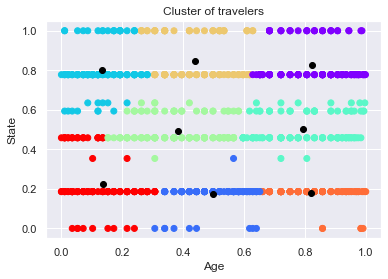

In [201]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of travelers')
plt.xlabel('Age')
plt.ylabel('State')
plt.show()

NEP

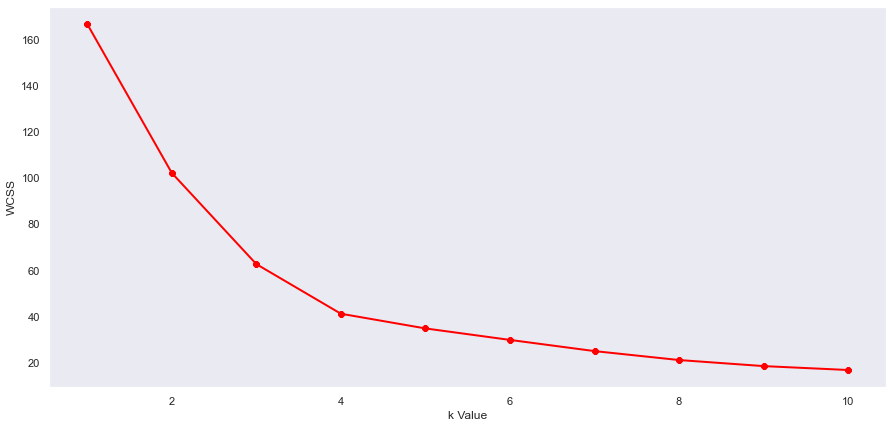

In [202]:
X2 = qtu_data.loc[:, ["Age","NEP"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [203]:
kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(X2)
print(label)

[3 3 3 3 2 2 1 0 3 1 3 0 2 2 2 0 2 2 1 3 1 0 0 3 2 1 3 2 3 1 3 0 3 0 0 1 1
 1 3 1 3 0 0 3 0 3 0 3 1 2 3 3 0 2 0 2 1 2 0 1 1 2 2 2 1 1 0 2 1 2 3 0 2 2
 3 3 1 0 3 0 3 1 3 0 3 0 2 1 3 3 1 2 2 1 2 1 2 2 1 0 0 0 1 0 1 3 3 0 0 0 1
 3 1 0 0 0 3 1 0 0 1 1 2 2 2 3 3 0 3 0 3 3 0 2 2 1 3 2 1 3 1 1 3 3 1 2 3 3
 0 0 1 0 1 1 0 0 1 2 2 3 2 2 0 3 1 1 2 2 2 0 1 0 2 2 2 0 2 3 0 0 2 3 1 1 2
 0 1 1 1 0 3 1 1 2 2 1 3 1 0 1 0 1 3 1 3 2 0 1 1 2 3 2 1 3 1 3 2 3 1 1 3 0
 3 0 2 3 1 2 1 0 1 0 1 3 0 1 3 3 1 3 0 0 1 2 0 0 0 0 2 2 1 1 0 1 1 2 1 1 0
 3 1 0 2 0 0 2 3 2 1 2 0 0 0 1 1 2 2 1 2 0 3 0 0 1 2 0 3 1 0 1 0 1 0 2 1 3
 1 3 3 1 0 2 3 2 3 0 0 3 3 1 3 0 1 3 1 0 2 1 1 0 2 0 2 1 1 1 3 0 2 3 0 2 0
 0 0 0 3 2 3 0 3 1 2 3 1 0 0 1 3 1 1 2 0 2 1 1 1 3 1 1 0 3 0 2 3 0 2 0 1 1
 0 3 3 0 2 1 3 1 0 0 1 3 1 2 3 1 1 3 2 2 3 1 0 3 3 2 1 2 0 0 0 3 0 1 3 3 2
 1 3 3 2 3 0 2 3 2 0 2 2 2 2 1 3 2 3 2 2 1 2 1 3 2 0 0 2 1 0 3 0 0 0 2 2 2
 2 3 2 3 1 3 1 2 1 3 1 0 3 2 3 0 1 1 3 2 2 0 1 1 3 0 0 2 3 1 3 1 1 2 3 3 1
 0 1 3 0 0 3 2 1 3 2 3 2 

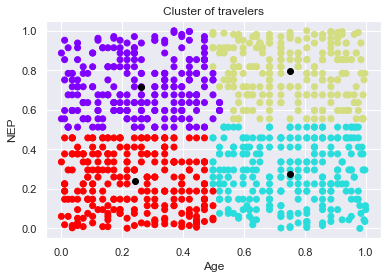

In [204]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of travelers')
plt.xlabel('Age')
plt.ylabel('NEP')
plt.show()